In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-01-09 03:21:12--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.172.102, 142.251.172.100, 142.251.172.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.172.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/68u8iq8rkt7637d34t6ovtv3p0guk6qu/1704770400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5a0c1c2c-634a-4b50-895e-cbda95717d5a [following]
--2024-01-09 03:21:14--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/68u8iq8rkt7637d34t6ovtv3p0guk6qu/1704770400000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5a0c1c2c-634a-4b50-895e-cbda95717d5a
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.206.132, 2607:f8b0:4001:c62::84
Connecting to d

# 前處理

透過初步的單變數探索來進行資料清洗與欄位切割。

In [ ]:
df = pd.read_excel("jambo-data/商品資料-2022_01.xlsx")
df.head(3)

,id,time,commodity_id,category,name,total_quantity,price,total_amount
0,4693259,2022-01-13 11,2950848,['3C與筆電'],TWO FLAVORS 金工手作課程(付訂階段，對戒全額刷清),2,4000,8000
1,4359629,2022-01-07 12,4824060,['居家生活'],微笑杯子,1,597,597
2,4176997,2022-01-04 02,4824247,['飾品、配件'],微笑戒指,7,378,2648


In [ ]:
# 分割年月日
def split_date(df, month):
    df["year"] = df["time"].apply(lambda x: x.split()[0].split("-")[0])
    df["month"] = df["time"].apply(lambda x: x.split()[0].split("-")[1])
    df["day"] = df["time"].apply(lambda x: x.split()[0].split("-")[2])
    df["hr"] = df["time"].apply(lambda x: x.split()[1])
    return df[(df["year"]=="2022") & (df["month"]==month)]

In [ ]:
[str(month).zfill(2) for month in range(1, 13)]

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [ ]:
df = pd.DataFrame()
for month in [str(month).zfill(2) for month in range(1, 13)]:
    df = pd.concat([df, split_date(pd.read_excel("jambo-data/商品資料-2022_"+month+".xlsx"), month)], axis=0)
df.reset_index(inplace=True, drop=True)
df["category"] = df["category"].apply(lambda x: re.sub(r'[\[\'|\'\]]', "", x))
df.to_csv("2022_data.csv", index=False, encoding="utf-8")
print(df.shape)
df.head()
# 2m 16.9s

(3684752, 12)


,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
0,4693259,2022-01-13 11,2950848,3C與筆電,TWO FLAVORS 金工手作課程(付訂階段，對戒全額刷清),2,4000,8000,2022,01,13,11
1,4359629,2022-01-07 12,4824060,居家生活,微笑杯子,1,597,597,2022,01,07,12
2,4176997,2022-01-04 02,4824247,飾品、配件,微笑戒指,7,378,2648,2022,01,04,02
3,4742731,2022-01-14 07,4824253,女生衣著,微笑上衣,7,399,2793,2022,01,14,07
4,4742819,2022-01-14 07,4824390,飾品、配件,第 003 標 (10/3)微笑南瓜,2,699,1398,2022,01,14,07


In [ ]:
df = pd.read_csv("2022_data.csv")
df.head()

,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
0,4693259,2022-01-13 11,2950848,3C與筆電,TWO FLAVORS 金工手作課程(付訂階段，對戒全額刷清),2,4000,8000,2022,1,13,11
1,4359629,2022-01-07 12,4824060,居家生活,微笑杯子,1,597,597,2022,1,7,12
2,4176997,2022-01-04 02,4824247,飾品、配件,微笑戒指,7,378,2648,2022,1,4,2
3,4742731,2022-01-14 07,4824253,女生衣著,微笑上衣,7,399,2793,2022,1,14,7
4,4742819,2022-01-14 07,4824390,飾品、配件,第 003 標 (10/3)微笑南瓜,2,699,1398,2022,1,14,7


## id

In [ ]:
df["id"].nunique() # id是unique的

3684752

## commodity_id

In [ ]:
df["commodity_id"].nunique() # 有重複的商品

3414170

## category

In [ ]:
df["category"].value_counts() # 有23種商品類別

category
女生衣著       685270
書籍及雜誌期刊    615480
居家生活       355913
美妝保健       348477
美食、伴手禮     325403
飾品、配件      319749
男生包包與配件    185002
男生衣著       174521
娛樂、收藏      114792
寵物          96543
嬰幼童與母親      89117
手機平板與周邊     73002
女生包包、精品     50703
汽機車零件百貨     48854
男女鞋         46477
家電影音        40888
3C與筆電       34701
服務、票券       23596
戶外、旅行       20617
電玩、遊戲       17685
運動、健身       14417
文創商品         3084
其他類別          461
Name: count, dtype: int64

## total_quantity

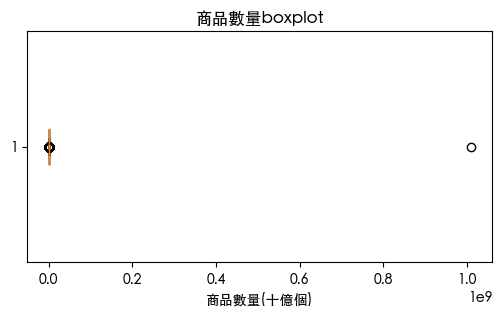

In [ ]:
plt.figure(figsize=(6,3))
plt.boxplot(df['total_quantity'], vert=False)
plt.title('商品數量boxplot')
plt.xlabel('商品數量(十億個)')
plt.ylabel('')
plt.show()

In [ ]:
df[df['total_quantity']>10000000] # 測試資料，予以移除

,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
655271,9203459,2022-04-21 10,7170828,書籍及雜誌期刊,第 002 標 (4/21)測試*1,1010000008,0,0,2022,4,21,10


In [ ]:
df.drop(df[df['total_quantity']>10000000].index, inplace=True)
df.shape # 確認資料剩幾筆

(3684751, 12)

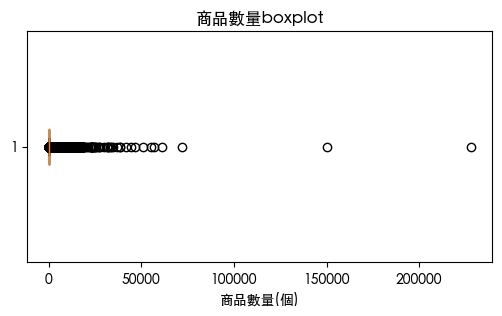

In [ ]:
plt.figure(figsize=(6,3))
plt.boxplot(df['total_quantity'], vert=False)
plt.title('商品數量boxplot')
plt.xlabel('商品數量(個)')
plt.ylabel('')
plt.show()

In [ ]:
df[df['total_quantity']>30000] # 觀察後欲移除：蝦皮轉單、預儲、贈

,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
183931,7067214,2022-03-09 13,6607944,美妝保健,第 090 標 (3/9) CHERESKIN溶液面膜、ZAVAVA面膜(單片隨機),55261,6,331566,2022,3,9,13
534241,8645365,2022-04-10 03,7023358,書籍及雜誌期刊,第 110 標 (4/10)-抖內標(最多+1000)(不會收到商品當純支持闆爸再下單),33375,1,33375,2022,4,10,3
673846,9268145,2022-04-22 15,7193228,美妝保健,第 014 標 (4/22)【LAYLA】惡魔晶凍(CLA+白藜蘆醇),38277,52,2008383,2022,4,22,15
1085864,11221582,2022-06-01 05,6789223,汽機車零件百貨,蝦皮轉單,38720,1,38720,2022,6,1,5
1124524,11240956,2022-06-01 15,7728995,書籍及雜誌期刊,"來預儲囉~~(不轉現,不兌現,完成付款後的訂單方能使用)",150000,1,150000,2022,6,1,15
1310644,12055527,2022-06-18 07,7952514,書籍及雜誌期刊,第 V29 標 (6/18)惡魔晶凍,31704,48,1516492,2022,6,18,7
1329747,12137914,2022-06-19 16,7974884,美妝保健,第 275 標 (6/19)(1條)【LAYLA】惡魔晶凍(CLA+白藜蘆醇),72122,47,3389734,2022,6,19,16
1482560,12691517,2022-07-01 03,8043109,美妝保健,C 第 054 標 (6/26)= (組合優惠) 韓國 BOTO 高濃度紅石榴冷萃鮮榨美妍飲...,32140,129,4130247,2022,7,1,3
2150668,15437514,2022-08-27 03,8901423,美妝保健,第 093 標 (8/27)-BOTO石榴汁80ml(2024.05)(限加1000包，超加...,37103,9,333927,2022,8,27,3
2178490,15551010,2022-08-29 15,8934500,居家生活,C 第 051 標 (8/29)= 韓國 Tutti Frutti 微笑文青蘋果汁 1包,46873,33,1546809,2022,8,29,15


In [ ]:
df.drop(1124524, inplace=True) # 預儲
df.drop(df[(df['name']=="蝦皮轉單") | (df['name']=="贈")].index, inplace=True)
df.shape

(3684425, 12)

In [ ]:
df['total_quantity'].describe()

count    3.684425e+06
mean     1.675222e+01
std      1.721945e+02
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      9.000000e+00
max      7.212200e+04
Name: total_quantity, dtype: float64

## price

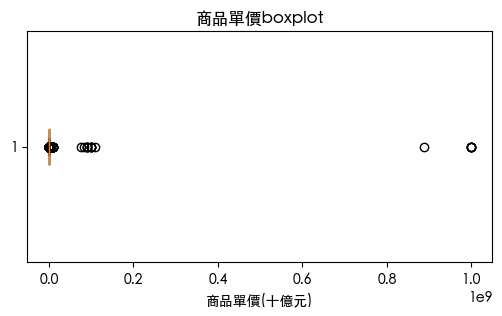

In [ ]:
plt.figure(figsize=(6,3))
plt.boxplot(df['price'], vert=False)
plt.title('商品單價boxplot')
plt.xlabel('商品單價(十億元)')
plt.ylabel('')
plt.show()

In [ ]:
df[df['price']>10000000] # 移除：合併訂單、不合理服飾價格(888888,99999的格式)、須知，其中有珠寶類單價高，予以保留

,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
876862,10153376,2022-05-10 13,7417939,書籍及雜誌期刊,000(公告)-合併訂單,9,999999999,8999999991,2022,5,10,13
1034589,11005614,2022-05-27 12,7660872,娛樂、收藏,第 003 標 (5/27)鈦晶,11,89644510,986089609,2022,5,27,12
1034802,11006063,2022-05-27 12,7661119,飾品、配件,第 005 標 (5/27)荷花魚冰掛件,12,82174367,986092409,2022,5,27,12
1034865,11006291,2022-05-27 12,7661193,書籍及雜誌期刊,第 006 標 (5/27)小綠觀音,11,89644810,986092909,2022,5,27,12
1034982,11006397,2022-05-27 12,7661324,書籍及雜誌期刊,第 007 標 (5/27)綠皮修,9,109565434,986088909,2022,5,27,12
1035411,11007189,2022-05-27 12,7661803,書籍及雜誌期刊,第 001 標 (5/27)西空,13,75853431,986094609,2022,5,27,12
1101635,11569829,2022-06-08 14,7417939,書籍及雜誌期刊,000(公告)-合併訂單,3,999999999,2999999997,2022,6,8,14
1486924,13674099,2022-07-20 20,8109050,男生衣著,PLEIN SPORT 5.黑色大字母LOGO短T/黑,1,88888888,88888888,2022,7,20,20
1487031,13388478,2022-07-15 05,8109745,男生衣著,LV 15.滿版印花LOGO牛仔外套,1,88888888,88888888,2022,7,15,5
2573530,18352690,2022-10-25 18,7898630,女生衣著,(A)Kangol外車縫雙口袋短褲 （藍6125150280）(不退換),1,99999999,99999999,2022,10,25,18


In [ ]:
df[df['price']>10000000].index

Index([ 876862, 1034589, 1034802, 1034865, 1034982, 1035411, 1101635, 1486924,
       1487031, 2573530, 2578379, 2669819, 2670319, 2670386, 2715664, 3548146,
       3589931],
      dtype='int64')

In [ ]:
keep = [1034589, 1034802, 1034865, 1034982, 1035411] # 珠寶類單價較高，故予以保留
df.drop(df[(df['price'] > 10000000) & (~df.index.isin(keep))].index, inplace=True)
df.shape

(3684413, 12)

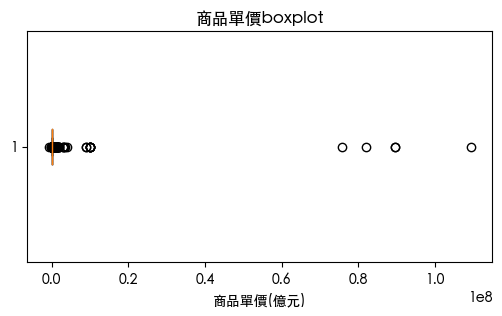

In [ ]:
plt.figure(figsize=(6,3))
plt.boxplot(df['price'], vert=False)
plt.title('商品單價boxplot')
plt.xlabel('商品單價(億元)')
plt.ylabel('')
plt.show()

In [ ]:
df[df['price']>1000000] # 移除：不合理價格(兩千萬的抱枕、888888,99999的格式)、測試、匯款帳號，保留精品類商品

,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
109226,7194671,2022-03-11 16,6518334,飾品、配件,ROLEX 玫瑰金 巧克力面 DAYTONA 116515LN T202203***...,1,1580000,1580000,2022,3,11,16
172904,7411744,2022-03-16 12,6594394,3C與筆電,ROLEX 116518LN 40MM Daytona 保羅紐曼 極新美品99成新 ...,1,1695000,1695000,2022,3,16,12
259489,7408833,2022-03-16 11,6701075,飾品、配件,ROLEX DAYTONA 全金玫瑰巧克力面 T20220316-02,1,2000000,2000000,2022,3,16,11
331014,7750476,2022-03-23 06,6788323,飾品、配件,3/23-天然翡翠A貨大蛋面帝王綠吊墜$150萬,1,1500000,1500000,2022,3,23,6
369135,7909977,2022-03-26 07,6834339,書籍及雜誌期刊,抱枕,3,2000000,6000000,2022,3,26,7
370640,7913335,2022-03-26 09,6836203,書籍及雜誌期刊,poc 第二品,1,3333333,3333333,2022,3,26,9
417212,8126380,2022-03-30 15,6893327,3C與筆電,ROLEX 29.Daytona/116515LN/玫瑰金 極新二手美品 +++++++,1,1450000,1450000,2022,3,30,15
567246,8800074,2022-04-13 09,7062383,書籍及雜誌期刊,第 001 標 (4/13) 測試2,1,1245678,1245678,2022,4,13,9
584904,8863451,2022-04-14 14,7083738,飾品、配件,ROLEX 116599-RBR 白金滿鑽Daytona 40MM T20220414-26,1,3200000,3200000,2022,4,14,14
1034589,11005614,2022-05-27 12,7660872,娛樂、收藏,第 003 標 (5/27)鈦晶,11,89644510,986089609,2022,5,27,12


In [ ]:
df.drop([369135, 567246, 2219525, 2668781, 3548183, 3587451, 3634706], inplace=True)
df.shape

(3684406, 12)

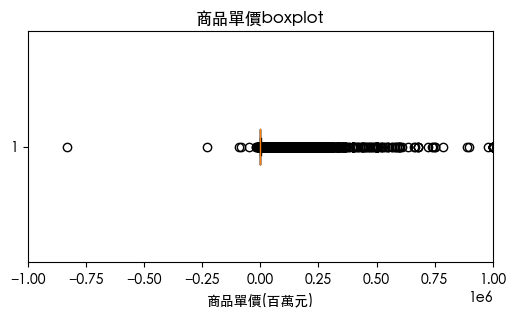

In [ ]:
# 細部觀察
matplotlib.rcParams['font.family'] = "HeiTi TC"
plt.figure(figsize=(6,3))
plt.boxplot(df['price'], vert=False)
plt.title('商品單價boxplot')
plt.xlabel('商品單價(百萬元)')
plt.ylabel('')
plt.xlim((-1000000,1000000))
plt.show()

In [ ]:
# 有購物金、免運跟退貨
df[df['price']<0]

,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
497,4053009,2022-01-01 08,5831069,服務、票券,第 054 標 (1/1)購物金,18,-3,-60,2022,1,1,8
1122,4060694,2022-01-01 14,5834878,居家生活,第 058 標 (1/1)免運,10,-18,-180,2022,1,1,14
3214,4096930,2022-01-02 14,5843624,居家生活,第 047 標 (1/2)免運,27,-24,-660,2022,1,2,14
3628,4121699,2022-01-02 17,5846112,美食、伴手禮,西班牙IBQ純種伊比利松阪豬*2公斤(正負50克),29,-414,-12002,2022,1,2,17
15532,4369820,2022-01-07 15,5912059,服務、票券,第 053 標 (1/7)購物金,48,-1,-60,2022,1,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3679082,21426586,2022-12-31 06,10720897,服務、票券,送購物金30(限當週使用_),5,-30,-150,2022,12,31,6
3680446,21429970,2022-12-31 08,10722495,服務、票券,第 045 標 (12/31)購物金,60,-30,-1800,2022,12,31,8
3681354,21433130,2022-12-31 11,10723644,書籍及雜誌期刊,(12/3晚場)分享禮*50元~~10位,10,-50,-500,2022,12,31,11
3681942,21434705,2022-12-31 12,10724418,服務、票券,送購物金30(限當週使用,3,-30,-90,2022,12,31,12


In [ ]:
df['price'].min()

-832614

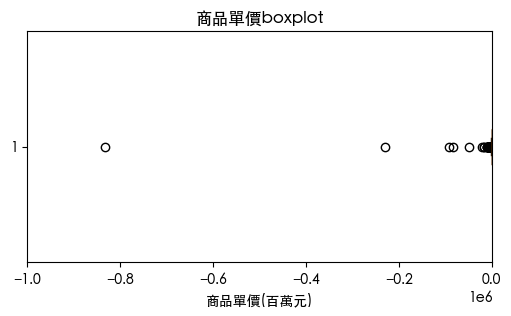

In [ ]:
# 細部觀察
matplotlib.rcParams['font.family'] = "HeiTi TC"
plt.figure(figsize=(6,3))
plt.boxplot(df['price'], vert=False)
plt.title('商品單價boxplot')
plt.xlabel('商品單價(百萬元)')
plt.ylabel('')
plt.xlim((-1000000,2000))
plt.show()

In [ ]:
df['price'].describe()

count    3.684406e+06
mean     1.234697e+03
std      1.055552e+05
min     -8.326140e+05
25%      1.250000e+02
50%      2.990000e+02
75%      6.990000e+02
max      1.095654e+08
Name: price, dtype: float64

## total_amount

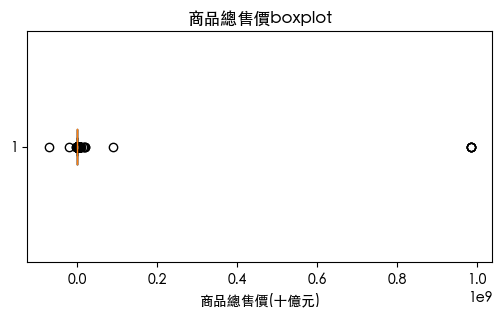

In [ ]:
plt.figure(figsize=(6,3))
plt.boxplot(df['total_amount'], vert=False)
plt.title('商品總售價boxplot')
plt.xlabel('商品總售價(十億元)')
plt.ylabel('')
# plt.xlim((-1000000,2000))
plt.show()

In [ ]:
df[df['total_amount']>100000000] # 與price有關，處理完price後這邊就會解決了，這邊剩下高單價的珠寶精品

,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
1034589,11005614,2022-05-27 12,7660872,娛樂、收藏,第 003 標 (5/27)鈦晶,11,89644510,986089609,2022,5,27,12
1034802,11006063,2022-05-27 12,7661119,飾品、配件,第 005 標 (5/27)荷花魚冰掛件,12,82174367,986092409,2022,5,27,12
1034865,11006291,2022-05-27 12,7661193,書籍及雜誌期刊,第 006 標 (5/27)小綠觀音,11,89644810,986092909,2022,5,27,12
1034982,11006397,2022-05-27 12,7661324,書籍及雜誌期刊,第 007 標 (5/27)綠皮修,9,109565434,986088909,2022,5,27,12
1035411,11007189,2022-05-27 12,7661803,書籍及雜誌期刊,第 001 標 (5/27)西空,13,75853431,986094609,2022,5,27,12


In [ ]:
df['total_amount'].describe() # 負數也跟price有關

count    3.684406e+06
mean     7.725960e+03
std      1.151333e+06
min     -7.056554e+07
25%      3.090000e+02
50%      1.000000e+03
75%      3.560000e+03
max      9.860946e+08
Name: total_amount, dtype: float64

## year, month, day, hr

In [ ]:
df['year'].drop_duplicates()

0    2022
Name: year, dtype: int64

In [ ]:
df['month'].drop_duplicates()

0           1
74310       2
89840       3
418179      4
750914      5
1080775     6
1450694     7
1832008     8
2200255     9
2566288    10
2950119    11
3334049    12
Name: month, dtype: int64

In [ ]:
df['day'].drop_duplicates().sort_values(ascending=True)

19        1
5         2
6         3
2         4
25        5
261       6
1         7
247       8
8         9
16       10
223      11
5908     12
0        13
3        14
10       15
2419     16
20       17
2541     18
4077     19
275      20
11       21
214      22
3761     23
690      24
2023     25
254      26
5625     27
234      28
257      29
23898    30
11006    31
Name: day, dtype: int64

In [ ]:
df['hr'].drop_duplicates().sort_values(ascending=True)

12       0
16       1
2        2
32       3
33       4
6        5
5        6
3        7
19       8
26       9
7       10
0       11
1       12
9       13
13      14
11      15
700     16
1463    17
672     18
270     19
1624    20
1626    21
1638    22
687     23
Name: hr, dtype: int64

In [ ]:
df.to_csv("2022_data_clean.csv", index=False, encoding="utf-8")

## 篩選美妝保健

In [ ]:
df_all = pd.read_csv('2022_data_clean.csv').dropna()
print(df_all.shape)
df_all.head()

(3684360, 12)


,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr
0,4693259,2022-01-13 11,2950848,3C與筆電,TWO FLAVORS 金工手作課程(付訂階段，對戒全額刷清),2,4000,8000,2022,1,13,11
1,4359629,2022-01-07 12,4824060,居家生活,微笑杯子,1,597,597,2022,1,7,12
2,4176997,2022-01-04 02,4824247,飾品、配件,微笑戒指,7,378,2648,2022,1,4,2
3,4742731,2022-01-14 07,4824253,女生衣著,微笑上衣,7,399,2793,2022,1,14,7
4,4742819,2022-01-14 07,4824390,飾品、配件,第 003 標 (10/3)微笑南瓜,2,699,1398,2022,1,14,7


In [ ]:
# 增加欄位計算商品名稱中的加號，以便後續探索加號是否代表著該交易為商品組合
df_all['name'] = df_all['name'].replace([r'\+\d+', r'\+{2,}'], ['', ''], regex=True) # 首先把「+一個以上的數字」和「連續兩個或以上加號」都取代為空白
df_all['num_+'] = df_all['name'].str.count('\+')
df_all['combination'] = df_all['num_+'].apply(lambda x: 1 if x>0 else 0)
print(df_all.shape)
df_all.head()

(3684360, 14)


,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination
0,4693259,2022-01-13 11,2950848,3C與筆電,TWO FLAVORS 金工手作課程(付訂階段，對戒全額刷清),2,4000,8000,2022,1,13,11,0,0
1,4359629,2022-01-07 12,4824060,居家生活,微笑杯子,1,597,597,2022,1,7,12,0,0
2,4176997,2022-01-04 02,4824247,飾品、配件,微笑戒指,7,378,2648,2022,1,4,2,0,0
3,4742731,2022-01-14 07,4824253,女生衣著,微笑上衣,7,399,2793,2022,1,14,7,0,0
4,4742819,2022-01-14 07,4824390,飾品、配件,第 003 標 (10/3)微笑南瓜,2,699,1398,2022,1,14,7,0,0


In [ ]:
df_all[df_all['category']=='美妝保健'].to_csv('美妝保健_全.csv')

## 美妝保健字典

In [ ]:
dic = pd.read_csv('美妝保健_商品組合_人工標記後_500.csv')
print(dic.shape)
dic.head(3)

(500, 17)


,id,time,commodity_id,category,name,name_list,保健,保養,total_quantity,price,total_amount,year,month,day,hr,num_+,combination
0,9298483,2022-04-23 03,7197939,美妝保健,第 002 標 (4/23)YSL紅色小化妝包+Anna Sui香水禮盒組,化妝包 香水禮盒,NaN,NaN,2,699,1398,2022,4,23,3,1,1
1,9749702,2022-05-02 10,7318080,美妝保健,176(0502)-TEAZEN康普茶(桃子*1+檸檬*1),康普茶,NaN,NaN,1,325,325,2022,5,2,10,1,1
2,19556012,2022-11-19 05,10066261,美妝保健,F(預購)薑黃PLUS+膠囊*3,膠囊,薑黃PLUS+,NaN,1,1000,1000,2022,11,19,5,1,1


In [ ]:
dic_list = []
for i in dic['name_list'].dropna().tolist():
  dic_list.extend(i.split())
print(len(dic_list))

dic_list = list(set(dic_list))
print(len(dic_list))
dic_list[:5]

906
445


['面霜', '滲透霜', '修護凝膠', '潤膚乳', '筆']

## 取出商品名稱

In [ ]:
df = pd.read_csv('美妝保健_全.csv')
print(df.shape)
df.head(3)

(348445, 15)


,Unnamed: 0,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination
0,9,4476172,2022-01-09 13,5510504,美妝保健,韓國天然護手霜,1,0,0,2022,1,9,13,0,0
1,23,4131831,2022-01-03 06,5660889,美妝保健,膠囊式護髮油50粒1罐,6,160,960,2022,1,3,6,0,0
2,29,4182387,2022-01-04 06,5746527,美妝保健,妞第 007 標 (12/24)神奇護髮素片面膜,4,399,1596,2022,1,4,6,0,0


In [ ]:
# 完全切分
def fully_segment(text, dic):
  word_list = []
  for i in range(len(text)):
    for j in range(i+1, len(text)+1):
      word = text[i:j]
      if word in dic: # 不存在語料庫中，則不會出現在斷詞結果
        word_list.append(word)
  return ' '.join(word_list)

In [ ]:
# 正向最長匹配
def forward_segment(text, dic):
  word_list = []
  i = 0
  while i < len(text):
    longest_word = text[i]
    for j in range(i+1, len(text)+1):
      word = text[i:j]
      if word in dic:
        if len(word)>len(longest_word):
          longest_word = word
    if longest_word in dic: # 新增
        word_list.append(longest_word)
    i += len(longest_word)
  return ' '.join(word_list)

In [ ]:
# 反向最長匹配
def backward_segment(text,dic):
  word_list = []
  i = len(text)-1
  while i>=0:
    longest_word = text[i]
    for j in range(0,i):
      word = text[j:i+1]
      if word in dic:
        if len(word) > len(longest_word):
          longest_word = word
    if longest_word in dic: # 新增
        word_list.insert(0,longest_word)
    i -= len(longest_word)
  return ' '.join(word_list)


In [ ]:
# 雙向最長匹配
def count_single_char(word_list: list):
  return sum(1 for word in word_list if len(word)==1)

def bidirectional_segment(text, dic):
  f = forward_segment(text,dic)
  b = backward_segment(text,dic)
  if len(f)<len(b):
    return f
  elif len(f)>len(b):
    return b
  else:
    if count_single_char(f) < count_single_char(b):
      return f
    else:
      return b

In [ ]:
df['name_clean'] = df['name'].apply(lambda x: bidirectional_segment(x, dic_list))
print(df.shape)
df.head(3)
# 47m

(348445, 16)


,Unnamed: 0,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination,name_clean
0,9,4476172,2022-01-09 13,5510504,美妝保健,韓國天然護手霜,1,0,0,2022,1,9,13,0,0,護手霜
1,23,4131831,2022-01-03 06,5660889,美妝保健,膠囊式護髮油50粒1罐,6,160,960,2022,1,3,6,0,0,膠囊 護髮油
2,29,4182387,2022-01-04 06,5746527,美妝保健,妞第 007 標 (12/24)神奇護髮素片面膜,4,399,1596,2022,1,4,6,0,0,護髮素 面膜


In [ ]:
df['name_clean'].isna().sum() # 沒有切出東西的數量為0，表示都有切出商品名稱

0

In [ ]:
# 算有幾個商品
df['num_product'] = df['name_clean'].apply(lambda x: x.count(' ')+1)
print(df.shape)
df.head(2)

(348445, 17)


,Unnamed: 0,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination,name_clean,num_product
0,9,4476172,2022-01-09 13,5510504,美妝保健,韓國天然護手霜,1,0,0,2022,1,9,13,0,0,護手霜,1
1,23,4131831,2022-01-03 06,5660889,美妝保健,膠囊式護髮油50粒1罐,6,160,960,2022,1,3,6,0,0,膠囊 護髮油,2


In [ ]:
df['num_product'].describe()

count    348445.000000
mean          1.390994
std           0.796968
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          13.000000
Name: num_product, dtype: float64

In [ ]:
df = df[df['num_product']>1]
df.shape

(93640, 17)

In [ ]:
df.to_csv('df_name_clean_全.csv', index=False)

## 確認商品名稱

根據字典切分結果，原商品名稱「膠囊式護髮油50粒1罐」會變成「膠囊 護髮油」，在做商品數量計算時會變成兩個商品，因此要針對這部分進行處理。

In [ ]:
df = pd.read_csv('df_name_clean_全.csv')
print(df.shape)
df.head(3) # 觀察name_clean結果，原本一個商品卻變成了兩個商品

In [ ]:
df['name_clean_combi'] = ''

for id in df['id'].tolist():
  name = df.loc[df['id']==id, 'name'].values[0]
  name_clean = df.loc[df['id']==id, 'name_clean'].values[0]
  name_clean_list = name_clean.split()
  name_clean_combi = name_clean_list[0] # str

  for i in range(1, len(name_clean_list)):
    s1 = name_clean_list[i-1]
    s2 = name_clean_list[i]
    between_name_pat = re.compile(re.escape(s1) + r'(.*?)' + re.escape(s2)) # 先找出介於s1到s2的字串
    match = between_name_pat.search(name)
    if match:
      between_name = match.group(1)
      symbol_pattern = re.compile(r'[\+\-\/\\\(\)&\*\[\]]')
      if symbol_pattern.findall(between_name):
        name_clean_combi = name_clean_combi+' '+s2
      else:
        name_clean_combi = name_clean_combi+s2

  df.loc[df['id']==id, 'name_clean_combi'] = name_clean_combi

df['num_product'] = df['name_clean_combi'].apply(lambda x: x.count(' ')+1) # 重算有幾個商品組合！
print(df.shape)
df.head(3)

(93640, 18)


,Unnamed: 0,id,time,commodity_id,category,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination,name_clean,num_product,name_clean_combi
0,23,4131831,2022-01-03 06,5660889,美妝保健,膠囊式護髮油50粒1罐,6,160,960,2022,1,3,6,0,0,膠囊 護髮油,1,膠囊護髮油
1,29,4182387,2022-01-04 06,5746527,美妝保健,妞第 007 標 (12/24)神奇護髮素片面膜,4,399,1596,2022,1,4,6,0,0,護髮素 面膜,1,護髮素面膜
2,31,4187365,2022-01-04 10,5771169,美妝保健,H第 029 標 (12/26)蔓越莓膠原蛋白,1,299,299,2022,1,4,10,0,0,蔓越莓 膠原蛋白,1,蔓越莓膠原蛋白


In [ ]:
# 觀察實際商品數量與加號的關係
print(len(df[(df['num_+']==0)&(df['num_product']>1)])) # 沒有加號，但實際是商品組合 個數 14775
print(len(df[(df['num_+']==0)&(df['num_product']>1)])/len(df)) # 沒有加號，但實際是商品組合 比例 0.16

14775
0.15778513455788123


In [ ]:
df.to_csv('df_name_clean_combi.csv', index=False) # 所有美妝保健商品

In [ ]:
df2 = df[df['num_product']>1] # 找出為商品組合的資料(商品個數>1)
df2['num_product'].describe()

count    28875.000000
mean         2.454442
std          0.861843
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: num_product, dtype: float64

In [ ]:
df2.to_csv('df_name_clean_combi_filter.csv', index=False) # 所有美妝保健商品組合

# 背景 EDA

## 總體

In [ ]:
df = pd.read_csv('2022_data_clean.csv')

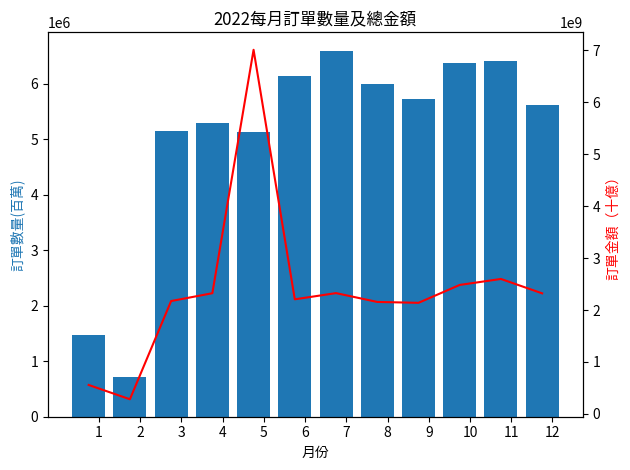

In [ ]:
# 訂單數量v.s.訂單總金額
summary = df[df['price']>0].groupby(by=['month']).agg({'total_quantity':np.sum, 'total_amount':np.sum})

width=0.25
fig, ax1 = plt.subplots()
plt.title('2022每月訂單數量及總金額')
plt.xlabel('月份')
ax2 = ax1.twinx()

x=[1,2,3,4,5,6,7,8,9,10,11,12]
ax1.set_ylabel('訂單數量(百萬)', color='tab:blue')
ax1.bar(x, height=summary['total_quantity'], color='tab:blue')

ax2.set_ylabel('訂單金額（十億）', color='red')
ax2.plot(x, summary['total_amount'], color='red')
fig.tight_layout()
plt.xticks([p + width for p in x], x) #設定 X 軸刻度標籤
plt.show()
# 可以再看一下「4、5月份銷售的商品差別」

Text(0.5, 1.0, '月初、月中、月底的訂單數量變化')

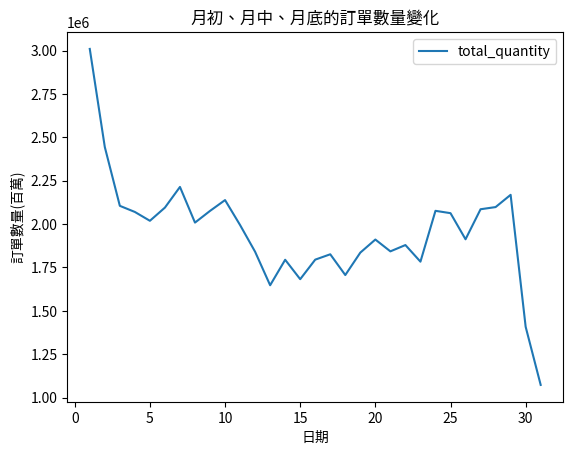

In [ ]:
# 月初、月中、月底的訂單數量
summary=df[df['price']>0].groupby(by=['day']).agg({'total_quantity':np.sum})
summary.plot()
plt.xlabel('日期')
plt.ylabel('訂單數量(百萬)')
plt.title('月初、月中、月底的訂單數量變化')

Text(0.5, 1.0, '訂單成立時間分佈')

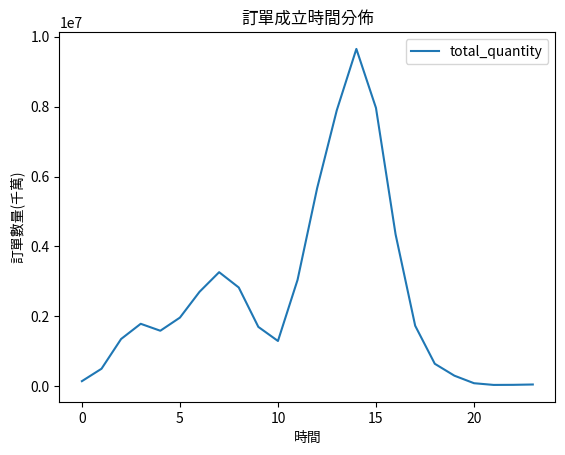

In [ ]:
# 訂單成立時間分佈
summary=df[df['price']>0].groupby(by=['hr']).agg({'total_quantity':np.sum})
summary.plot()
plt.xlabel('時間')
plt.ylabel('訂單數量(千萬)')
plt.title('訂單成立時間分佈')

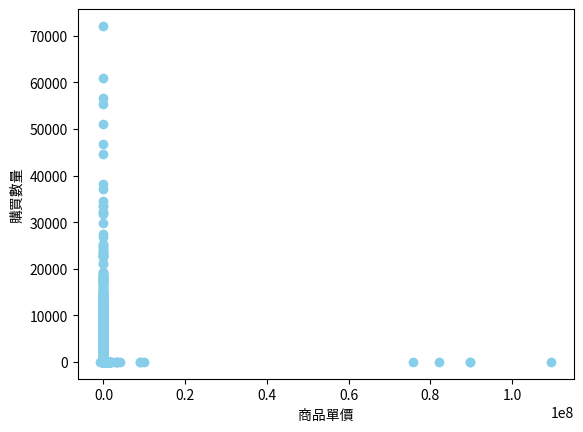

In [ ]:
# 單價越高是否購買數量越少？
plt.scatter(df['price'], df['total_quantity'], color='skyblue')
# plt.title('商品單價與購買數量之散佈圖')
plt.xlabel('商品單價')
plt.ylabel('購買數量')
plt.show()

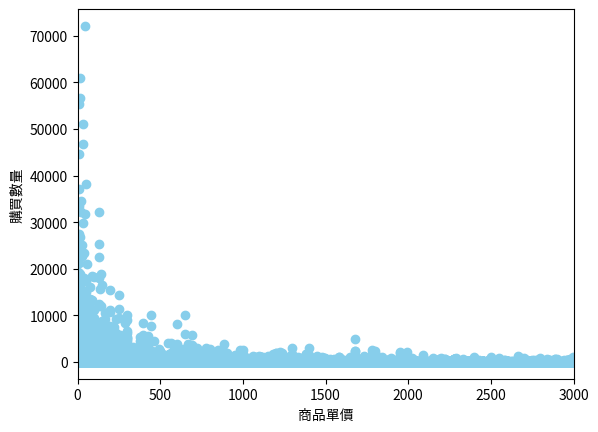

In [ ]:
# 單價越高是否購買數量越少？觀察單價3000以下
plt.scatter(df['price'], df['total_quantity'], color='skyblue')
# plt.title('商品單價與購買數量之散佈圖')
plt.xlabel('商品單價')
plt.ylabel('購買數量')
plt.xlim((0,3000))
plt.show()

Text(0, 0.5, 'Price')

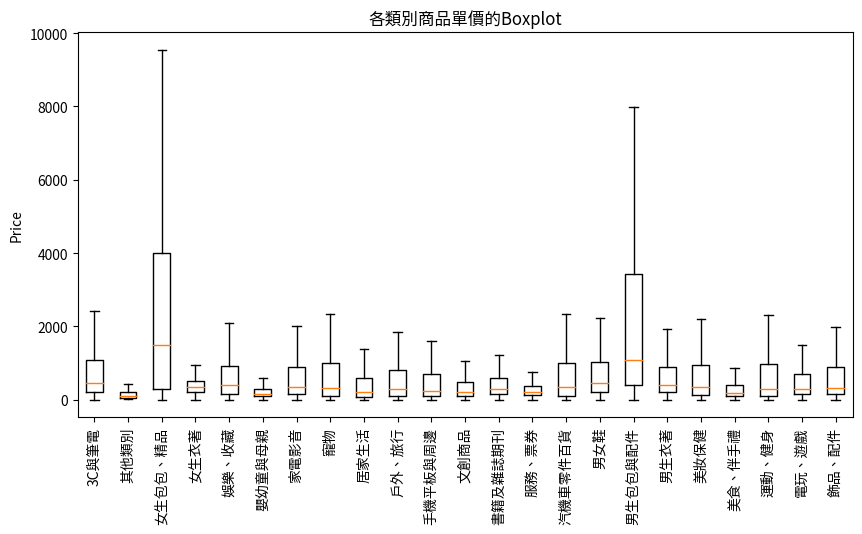

In [ ]:
# 各類別商品單價的boxplot
name = np.unique(df['category']).tolist()

for i in range(1,24):
  globals()['price'+str(i)] = df[(df['price']>0)&(df['category']==name[i-1])]['price']

price = []
for i in range(1,24):
  price.append(globals()['price'+str(i)])

plt.figure(figsize=(10, 5))
plt.boxplot(price,labels=name, showfliers=False) #移除outlier較清楚
plt.xticks(rotation=90)
plt.title('各類別商品單價的Boxplot')
plt.ylabel('Price')
#包包的平均單價都較高，且range也最大

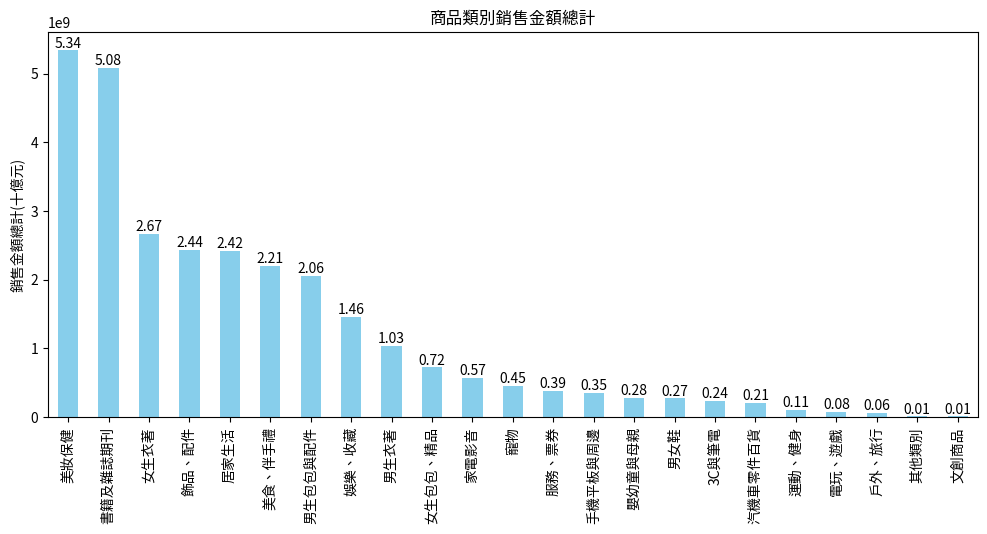

In [ ]:
summary = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
ax = summary.plot(kind='bar', color='skyblue', figsize=(12, 5))
plt.title('商品類別銷售金額總計')
plt.xlabel('')
plt.ylabel('銷售金額總計(十億元)')
plt.xticks(rotation=90)
# plt.ylim((0,6000000000))
for i, v in enumerate(summary):
    ax.text(i, v + 10, round(v/1000000000,2), ha='center', va='bottom')
plt.show()

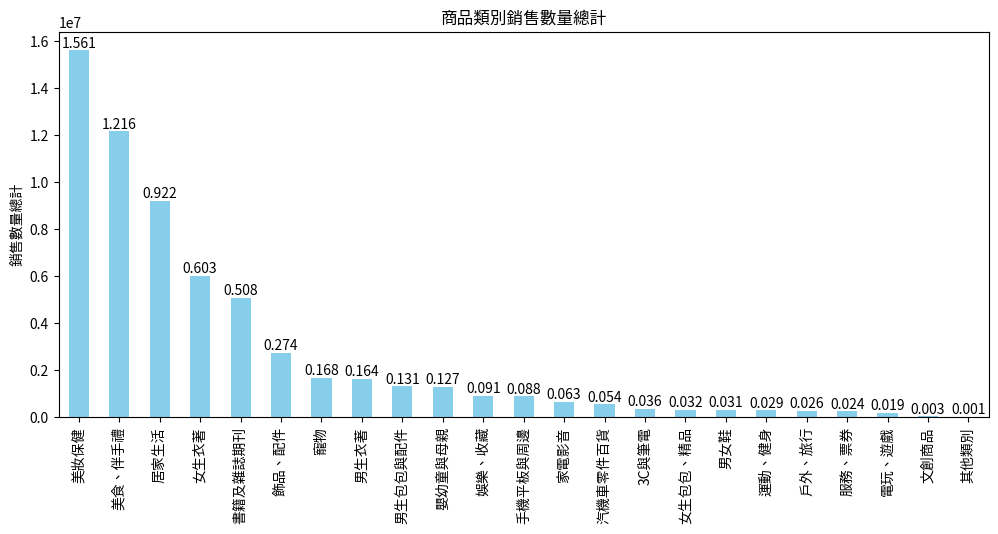

In [ ]:
summary = df.groupby('category')['total_quantity'].sum().sort_values(ascending=False)
ax = summary.plot(kind='bar', color='skyblue', figsize=(12, 5))
plt.title('商品類別銷售數量總計')
plt.xlabel('')
plt.ylabel('銷售數量總計')
plt.xticks(rotation=90)
# plt.ylim((0,6000000000))
for i, v in enumerate(summary):
    ax.text(i, v + 10, round(v/10000000,3), ha='center', va='bottom')
plt.show()

## 美妝保健類別

In [ ]:
# 美妝保健類別
df_all = pd.read_csv('df_name_clean_combi.csv')

In [ ]:
df_combi = df_all[df_all['num_product']>1]
print('總金額佔比')
print(df_combi['total_amount'].sum() / df_all['total_amount'].sum() ) # 銷售總金額佔了一半
print('總數量佔比')
print(df_combi['total_quantity'].sum() / df_all['total_quantity'].sum() )

總金額佔比
0.5073341177079378
總數量佔比
0.2887344824765417


In [ ]:
print('美妝商品組合的銷售金額')
print(df_combi['total_amount'].sum()) # 1,109,510,010 約11億
print('美妝商品組合的銷售金額 佔 所有Jambo直播')
print(df_combi['total_amount'].sum() / df['total_amount'].sum() ) # 3.9%

美妝商品組合的銷售金額
1109510010
美妝商品組合的銷售金額 佔 所有Jambo直播
0.03897726060201129


In [ ]:
# 查看美妝保健商品組合的產品名稱
for i in range(20):
  print(df_combi.iloc[i]['name'])

20.TZ86-雅詩蘭黛三件禮盒組(特潤眼部超能量修護霜+銷售No.1小棕瓶+原生露) 1299
(闆)公主 0101 NMN-(限)(11件) BRE NMN EX 膠囊(30顆/盒)*10+BRE 牛樟芝 子實體原片(1.3g±10%/朵) (1朵/盒)*1
(闆)888 0101 NMN-(限)(11件) BRE NMN EX 膠囊(30顆/盒)*10+BRE 牛樟芝 子實體原片(1.3g±10%/朵) (1朵/盒)*1
第 527 標 嫩白保濕水凝霜/護手霜/玫瑰精油
第 529 標 人蔘萃取護髮素/玫瑰精油/護手霜
第 531 標 髮立健洗髮精/艾草精油
公主 0101 A08-(限)(2箱)Mixzuzu 美容膠原蛋白莓妍飲190ml(24瓶/箱)－草莓奶昔*2
888 0101 A04-(5件組)亞希朵洗護沐428ml*4(米-無懈可擊*1/紅-燙染後修護*1/ 紫-水潤滑順*1/黃-生薑滋養*1)+蝸牛極致(護髮)760ML*1
888 0101 A09-乾洗髮系列300ml*4(綠-無香*1/紫-牡丹*1/粉-玫瑰香檳*1/藍-小蒼蘭*1)
公主 0101 B03-(4罐)凱樂沙龍專業洗髮精 (2000ml)*4(玫瑰*1+綠茶*2+薄荷*1)
第 551 標-氣墊FS20/CY-036/V膜/鉚釘刷具/三色修容高光
第 552 標-牛油果卸妝濕巾/玫瑰精油/薰衣草精油/艾草精油
(闆)888 0101 NMN-(限)(11件) BRE NMN EX 膠囊(30顆/盒)*10+BRE 牛樟芝 子實體原片(1.3g±10%/朵) (1朵/盒)*1
H355 后 八字紋精華液 50包 $799 (化妝水後使用~)
(蘋)公主 0101 A05-(5件組)龜鹿五臻寶(30g/罐)-(10入裝)*4+BRE 牛樟芝 子實體原片(1.3g±10%/朵) (1朵/盒)*1
第 044 標(1/1)KT涼感衛生棉(可選)-護-護墊15.5CMx20片/日-日用24.5CMx8片/夜-夜用34CMx5片-擇1-一包39元
第 046 標(1/1)台灣製限量版女神口罩(可選)-數位迷彩/典雅神藍/粉紅莞婷/粉藍天際/清新莞約/清新莞約/大理石-擇1-10片入一盒249元(接2連3)
888 0101 A08-(限)(2箱)Mixzuzu 美容膠原蛋白莓妍飲190ml

In [ ]:
# 產品數量的佔比
df_grp_month = df_combi.groupby(['month'])['month'].count()
df_grp_month = pd.DataFrame(df_grp_month)
df_grp_month = df_grp_month.rename(columns={"month": "combination"})

df_grp_month_ori = df_all.groupby(['month'])['month'].count()
df_grp_month_ori = pd.DataFrame(df_grp_month_ori)
df_grp_month_ori = df_grp_month_ori.rename(columns={"month": "all"})

df_month = pd.concat([df_grp_month, df_grp_month_ori], axis=1)
df_month["ratio"] = df_month["combination"]/df_month["all"]
df_month

,combination,all,ratio
month,,,
1,789,1941,0.406491
2,515,1166,0.441681
3,2610,7930,0.329130
4,2605,8054,0.323442
5,2440,8356,0.292006
6,2825,9237,0.305835
7,3169,10294,0.307849
8,2826,9473,0.298322
9,2740,9088,0.301496


In [ ]:
# 銷售額的佔比
df_grp_month_amount = df_combi.groupby(['month'])['total_amount'].sum()
df_grp_month_amount = pd.DataFrame(df_grp_month_amount)
df_grp_month_amount = df_grp_month_amount.rename(columns={"total_amount": "combination"})

df_grp_month_ori_amount = df_all.groupby(['month'])['total_amount'].sum()
df_grp_month_ori_amount = pd.DataFrame(df_grp_month_ori_amount)
df_grp_month_ori_amount = df_grp_month_ori_amount.rename(columns={"total_amount": "all"})

df_month_amount = pd.concat([df_grp_month_amount, df_grp_month_ori_amount], axis=1)
df_month_amount["ratio"] = df_month_amount["combination"]/df_month_amount["all"]
df_month_amount # 在二到四月的時候，組合的總銷售額佔了12-18%，不可忽視

,combination,all,ratio
month,,,
1,33828946,53826128,0.628486
2,15528735,27152369,0.571911
3,93405215,169580693,0.550801
4,159694910,240212178,0.664808
5,91098199,170316783,0.534875
6,108914321,197783620,0.550674
7,96241924,217189730,0.443124
8,92381541,179465083,0.514761
9,125781884,232759134,0.540395


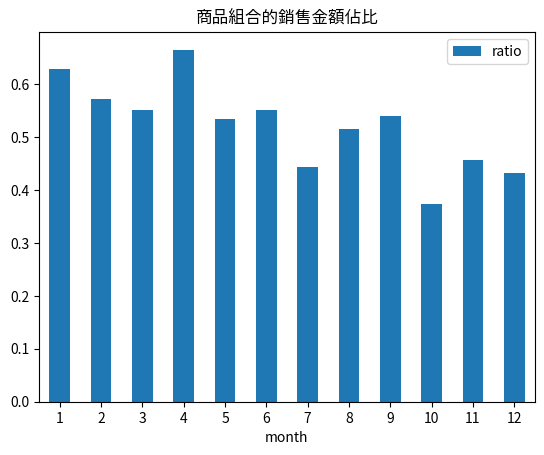

In [ ]:
df_month_amount.plot.bar(y='ratio', rot=0)
plt.title('商品組合的銷售金額佔比')
plt.show()

# 關聯分析

In [ ]:
# 資料處理：原始資料是一筆觀測值為該商品一小時賣幾份，把資料變成一個觀測值為一筆商品交易，即賣10份會變成同樣的數據重複10筆觀測值
df2 = pd.read_csv('df_name_clean_combi_filter.csv')

# 多個商品拆開
df_repeated = df2.copy()
df_repeated['name_clean_combi_original'] = df_repeated['name_clean_combi']
df_repeated = df_repeated[['name_clean_combi_original','num_product','month','day','hr','name_clean_combi','total_quantity']]
df_repeated['name_clean_combi'] = df_repeated['name_clean_combi'].str.split()
df_repeated_split = df_repeated.explode('name_clean_combi')
df_repeated_split.reset_index(inplace=True) # index 可以表示一筆交易紀錄
print(df_repeated_split.shape)

# 變成dummy
df_repeated_split = pd.get_dummies(df_repeated_split, columns=['name_clean_combi'])
print(df_repeated_split.shape)

df_repeated_split.drop(columns=['name_clean_combi_original','num_product','month','day','hr'], inplace=True)
df_group = df_repeated_split.groupby(['index']).max()
print(df_group.shape)

# 按照銷售數量擴大交易紀錄
df_group_large = df_group.loc[df_group.index.repeat(df_group['total_quantity'])]
df_group_large.reset_index(drop=True, inplace=True)
df_group_large.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(70872, 8)
(70872, 2186)
(28875, 2180)


(1514214, 2180)

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.preprocessing import one_hot
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [ ]:
df_group_large.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name_clean_combi_BB霜,name_clean_combi_B群,name_clean_combi_B群膜衣錠,name_clean_combi_B群膠囊,name_clean_combi_B群錠,name_clean_combi_B群錠錠,name_clean_combi_CD夾,name_clean_combi_DD霜,name_clean_combi_DD霜化妝水凝膠精華眼霜,name_clean_combi_G511,...,name_clean_combi_鬍後乳,name_clean_combi_魚油,name_clean_combi_魚油噴霧,name_clean_combi_魚油發泡錠,name_clean_combi_魚油膠原蛋白,name_clean_combi_魚油膠囊,name_clean_combi_魚油錠,name_clean_combi_魷魚,name_clean_combi_鴛鴦釦,name_clean_combi_龍根菌
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 有1514214組，希望至少出現10000次，因此設定min_support=0.0066
df_group_large.columns = [re.sub('name_clean_combi_','',x) for x in df_group_large.columns]
frequent_itemsets = fpgrowth(df_group_large, min_support=0.0066, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.006904,(禮盒)
1,0.053168,(膠囊)
2,0.024252,(精油)
3,0.010883,(護手霜)
4,0.009144,(萃取護髮素)
...,...,...
94,0.012275,"(維他命錠, 錠)"
95,0.012982,"(葉黃素膠囊, 錠)"
96,0.008442,"(錠, 鈣錠)"
97,0.009874,"(霜, 緊緻霜)"


In [ ]:
# 關聯分析結果表格
ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7).sort_values(by=['support'], ascending=False)
print(ar.shape)
ar.to_csv('ar_minsup.0066_conf.7_.csv', index=False)
ar.head(3)

(41, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(膠原),(膠原蛋白),0.056090,0.078283,0.043850,0.781778,9.986584,0.039459,4.223766,0.953338
3,(酵素錠),(錠),0.046310,0.131114,0.041033,0.886045,6.757842,0.034961,7.624802,0.893397
2,(護墊),(衛生棉),0.026813,0.020505,0.020094,0.749433,36.548768,0.019544,3.909122,0.999437


In [ ]:
# confidence 最高的前 10 條 Rules
ar[['antecedents', 'consequents', 'confidence', 'lift']].sort_values(by=['confidence'], ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,confidence,lift
22,"(酵素, 蔓越莓錠, 酵素錠)",(錠),1.000000,7.626976
40,(粉精華乳),(粉),1.000000,10.158419
34,(薑黃維生素),(B群),1.000000,60.363325
21,"(酵素, 蔓越莓錠, 錠)",(酵素錠),0.999269,21.577601
30,"(酵素錠, 蔓越莓錠)",(錠),0.995974,7.596267
39,(緊緻霜),(霜),0.993885,28.645602
36,(維他命錠),(錠),0.992365,7.568745
14,"(酵素, 蔓越莓錠)",(錠),0.985598,7.517132
25,"(酵素, 蔓越莓錠)","(酵素錠, 錠)",0.984878,24.001993
17,"(酵素, 蔓越莓錠)",(酵素錠),0.984878,21.266839


In [ ]:
# lift 最高的前 10 條 Rules
ar[['antecedents', 'consequents', 'confidence', 'lift']].sort_values(by=['lift'], ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,confidence,lift
5,(蜂膠洗髮),(潤髮乳),0.929641,67.243479
6,(潤髮乳),(蜂膠洗髮),0.889940,67.243479
29,(蔓越莓錠),"(酵素, 錠, 酵素錠)",0.817885,60.654950
23,"(酵素, 錠, 酵素錠)",(蔓越莓錠),0.870800,60.654950
34,(薑黃維生素),(B群),1.000000,60.363325
35,(B群),(薑黃維生素),0.862228,60.363325
26,"(酵素, 酵素錠)","(蔓越莓錠, 錠)",0.757143,58.126001
27,"(蔓越莓錠, 錠)","(酵素, 酵素錠)",0.901440,58.126001
20,(蔓越莓錠),"(酵素, 酵素錠)",0.817885,52.738269
18,"(酵素, 酵素錠)",(蔓越莓錠),0.757143,52.738269


# 結果解讀

## 整體

計算銷售金額與銷售數量等。

In [ ]:
# 關聯分析結果（條件: minsupport=0.0066、confidence>0.7）
!gdown '1A7J4Nk9fyklPcD5pFZnM5-QjmDv_GztO'
ar = pd.read_csv('ar_minsup.0066_conf.7_.csv')
print(ar.shape)
ar.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1A7J4Nk9fyklPcD5pFZnM5-QjmDv_GztO
To: /content/ar_minsup.0066_conf.7_.csv
100% 8.77k/8.77k [00:00<00:00, 30.2MB/s]
(41, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'膠原'}),frozenset({'膠原蛋白'}),0.056090,0.078283,0.043850,0.781778,9.986584,0.039459,4.223766,0.953338
1,frozenset({'酵素錠'}),frozenset({'錠'}),0.046310,0.131114,0.041033,0.886045,6.757842,0.034961,7.624802,0.893397
2,frozenset({'護墊'}),frozenset({'衛生棉'}),0.026813,0.020505,0.020094,0.749433,36.548768,0.019544,3.909122,0.999437


In [ ]:
def sub_froz(frozenset_str):

  match = re.search(r'\{(.*?)\}', frozenset_str)

  if match:
      frozenset_elements = match.group(1)
      result_string = ' '.join(frozenset_elements.split(', '))
      result_string = re.sub('\'','',result_string)
  return result_string

ar['antecedents'] = ar['antecedents'].apply(sub_froz)
ar['consequents'] = ar['consequents'].apply(sub_froz)
ar.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,膠原,膠原蛋白,0.056090,0.078283,0.043850,0.781778,9.986584,0.039459,4.223766,0.953338
1,酵素錠,錠,0.046310,0.131114,0.041033,0.886045,6.757842,0.034961,7.624802,0.893397
2,護墊,衛生棉,0.026813,0.020505,0.020094,0.749433,36.548768,0.019544,3.909122,0.999437


In [ ]:
df = pd.read_csv('df_name_clean_combi_filter.csv')
print(df.shape)
df.head(3)

In [ ]:
ar[['total_quantity','ave_price','total_amount','ave_num_product']] = 0

for i in range(len(ar)):
  check = ar['antecedents'][i].split() + ar['consequents'][i].split()
  temp = pd.DataFrame()
  for j in range(len(df)):
    if all(w in df['name_clean_combi'][j].split() for w in check):
      temp = pd.concat([temp, df.iloc[[j]]])
  ar['total_quantity'][i] = temp['total_quantity'].sum()
  ar['ave_price'][i] = temp['price'].mean()
  ar['total_amount'][i] = temp['total_amount'].sum()
  ar['ave_num_product'][i] = temp['num_product'].mean()

In [ ]:
ar['rules'] = ar['antecedents']+', '+ar['consequents']
print(ar.shape)
ar.head(3)

(41, 15)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,total_quantity,ave_price,total_amount,ave_num_product,rules
0,膠原,膠原蛋白,0.056090,0.078283,0.043850,0.781778,9.986584,0.039459,4.223766,0.953338,66398,2107.375000,6771971,3.604167,"膠原, 膠原蛋白"
1,酵素錠,錠,0.046310,0.131114,0.041033,0.886045,6.757842,0.034961,7.624802,0.893397,62133,1274.652941,49021301,2.664706,"酵素錠, 錠"
2,護墊,衛生棉,0.026813,0.020505,0.020094,0.749433,36.548768,0.019544,3.909122,0.999437,30427,235.466216,1619642,2.148649,"護墊, 衛生棉"


In [ ]:
ar.to_csv('ar_eda.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


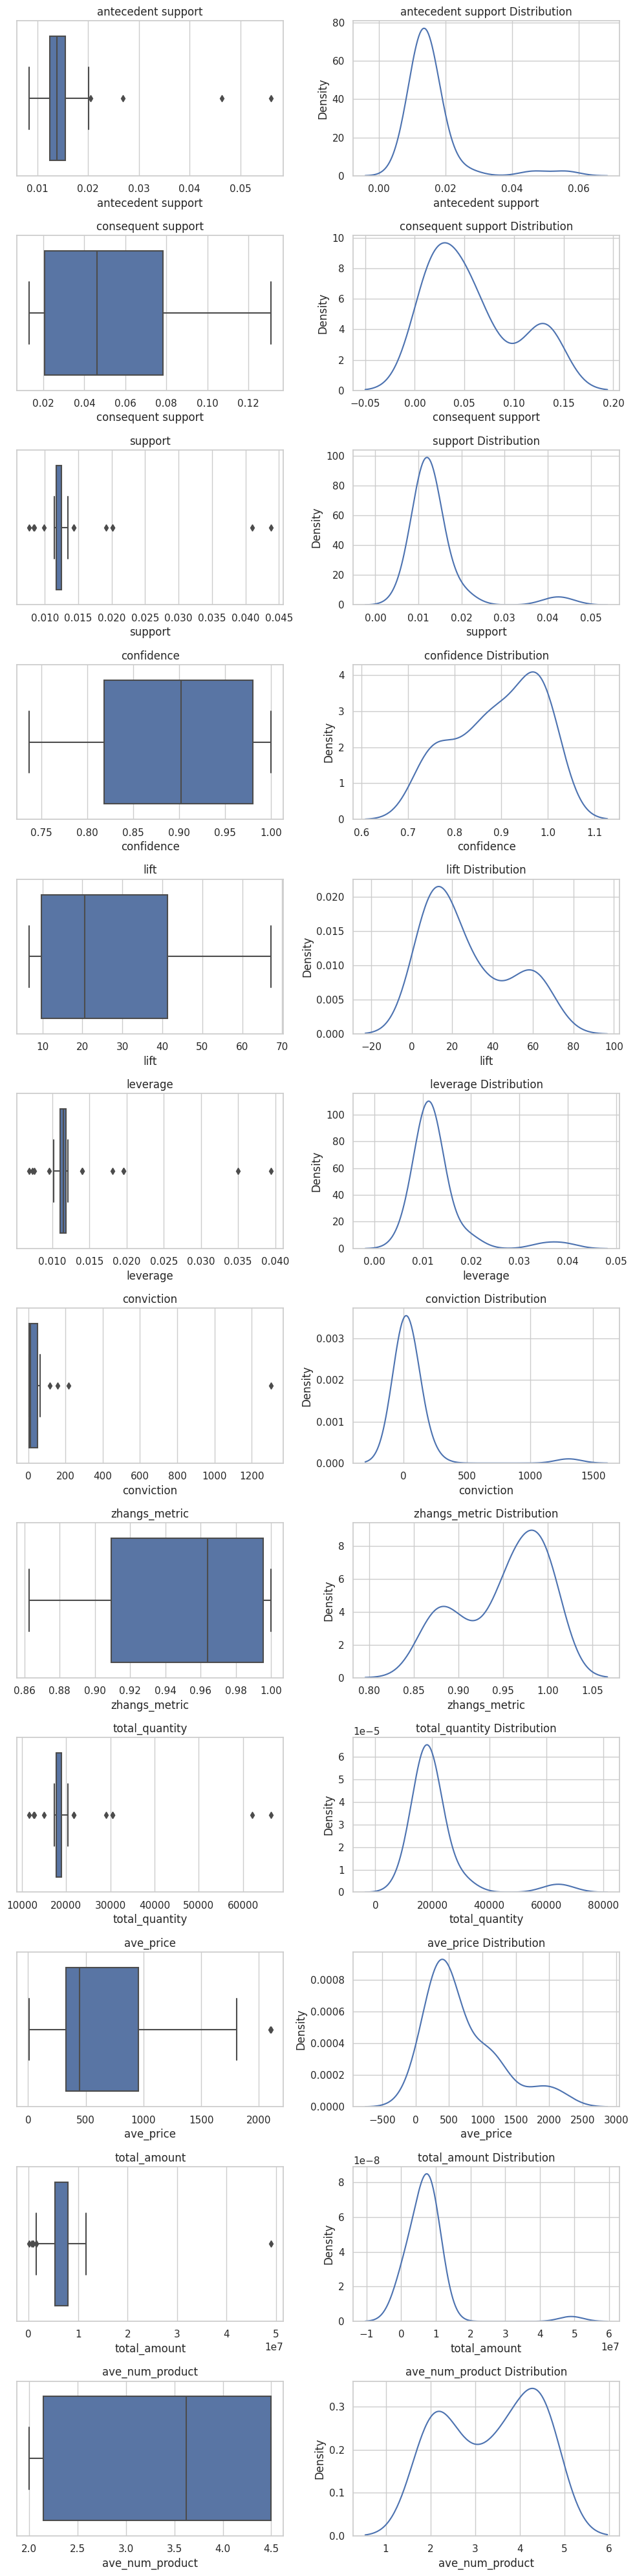

In [ ]:
# 觀察這41條rules的分布
col = ['antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric', 'total_quantity', 'ave_price',
       'total_amount', 'ave_num_product']

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(col), ncols=2, figsize=(10, 40))

for i, variable in enumerate(col):

    sns.boxplot(x=variable, data=ar, ax=axes[i, 0])
    axes[i, 0].set_title(f'{variable}')

    sns.kdeplot(data=ar, x=variable, ax=axes[i, 1])
    axes[i, 1].set_title(f'{variable} Distribution')

plt.tight_layout()
plt.show()

## 面膜

In [ ]:
df = pd.read_csv('/content/df_name_clean_combi.csv')
makeup = pd.read_csv('/content/美妝保健_全.csv')
makeup_set = pd.read_csv('/content/美妝保健_商品組合.csv')

# 資料處理
# 將「玻尿酸成分的面膜」中的「玻尿酸」替換為「bns」，才不會在篩選玻尿酸時篩選到「玻尿酸面膜」
condition1 = df['name_clean_combi'].str.contains('玻尿酸.*面膜') & ~df['name_clean_combi'].str.contains('玻尿酸.*\s.*面膜')
df.loc[condition1, 'name_clean_combi'] = df.loc[condition1, 'name_clean_combi'].str.replace('玻尿酸', 'bns')
condition2 = df['name_clean_combi'].str.contains('面膜.*玻尿酸') & ~df['name_clean_combi'].str.contains('面膜.*\s.*玻尿酸')
df.loc[condition2, 'name_clean_combi'] = df.loc[condition2, 'name_clean_combi'].str.replace('玻尿酸', 'bns')


In [ ]:
quantity = makeup['total_quantity'].sum()
amount = makeup['total_amount'].sum()
print('美妝保健所有商品總銷售量：',quantity)
print('美妝保健所有商品總銷售額：',amount)
print('-'*30)

select = df[(df['num_product']>1)]
quantity = select['total_quantity'].sum()
amount = select['total_amount'].sum()
print('美妝保健「組合商品」總銷售量：',quantity)
print('美妝保健「組合商品」總銷售額：',amount)
print('-'*30)

# 購買組合：「面膜+玻尿酸」
select = df[df['name_clean_combi'].str.contains('面膜') & df['name_clean_combi'].str.contains('玻尿酸')]
quantity = select['total_quantity'].sum()
amount = select['total_amount'].sum()
print('「面膜+玻尿酸」銷售量：',quantity)
print('「面膜+玻尿酸」銷售額：',amount)
print('-'*30)

# 購買組合：「面膜+其他東西」
select = df[df['name_clean_combi'].str.contains('面膜') & (df['num_product']>1)]
quantity = select['total_quantity'].sum()
amount = select['total_amount'].sum()
print('「面膜+其他商品」銷售量：',quantity)
print('「面膜+其他商品」銷售額：',amount)
print('-'*30)

# 只購買「玻尿酸」1項產品
select = df[df['name_clean_combi'].str.contains('玻尿酸') & df['num_product']==1]
quantity = select['total_quantity'].sum()
amount = select['total_amount'].sum()
print('只購買「玻尿酸」1項產品銷售量：',quantity)
print('只購買「玻尿酸」1項產品銷售額：',amount)
print('-'*30)

# 只購買「面膜」1項產品
select = df[df['name_clean_combi'].str.contains('面膜') & df['num_product']==1]
quantity = select['total_quantity'].sum()
amount = select['total_amount'].sum()
print('只購買「面膜」1項產品的銷售量：',quantity)
print('只購買「面膜」1項產品的銷售額：',amount)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


美妝保健所有商品總銷售量： 15606496
美妝保健所有商品總銷售額： 5338746199
------------------------------
美妝保健「組合商品」總銷售量： 1514214
美妝保健「組合商品」總銷售額： 1109510010
------------------------------
「面膜+玻尿酸」銷售量： 20047
「面膜+玻尿酸」銷售額： 2052600
------------------------------
「面膜+其他商品」銷售量： 133029
「面膜+其他商品」銷售額： 69066522
------------------------------
只購買「玻尿酸」1項產品銷售量： 95748
只購買「玻尿酸」1項產品銷售額： 32718591
------------------------------
只購買「面膜」1項產品的銷售量： 528079
只購買「面膜」1項產品的銷售額： 85540960


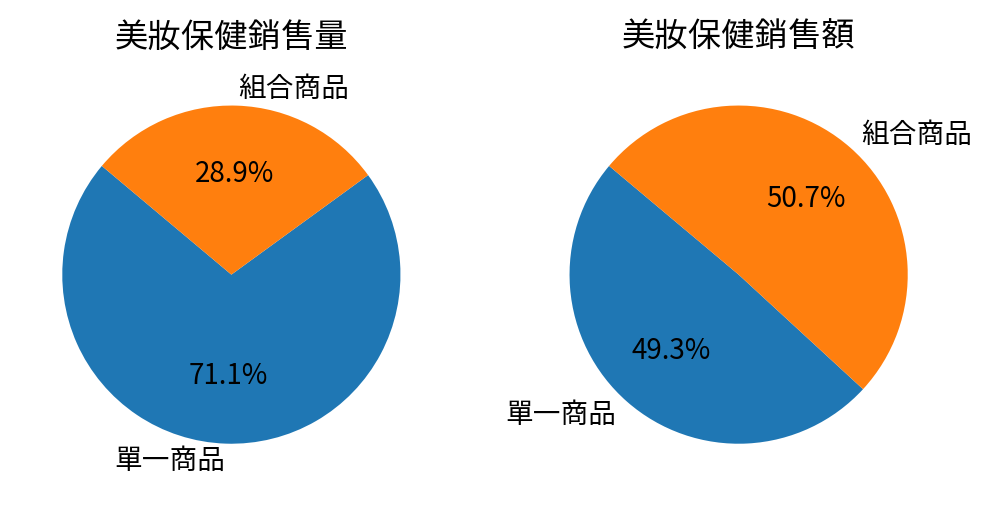

In [ ]:
df = pd.read_csv('df_name_clean_combi.csv')
df.drop(columns=['Unnamed: 0','time','commodity_id','category'], inplace=True)

# 美妝保健「單一商品」總銷售量
quantity_all = df[df['num_product']==1]['total_quantity'].sum()
# 美妝保健「單一商品」總銷售額
amount_all = df[df['num_product']==1]['total_amount'].sum()
# 美妝保健「組合商品」總銷售量
quantity_combination = df[df['num_product']>1]['total_quantity'].sum()
# 美妝保健「組合商品」總銷售額
amount_combination = df[df['num_product']>1]['total_amount'].sum()

fig, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=200)
# 圓餅圖1: 「單一商品」總銷售量 vs 「組合商品」總銷售量
labels_quantity = ['單一商品', '組合商品']
sizes_quantity = [quantity_all, quantity_combination]
axes[0].pie(sizes_quantity, labels=labels_quantity, autopct='%1.1f%%', startangle=140)
axes[0].set_title('美妝保健銷售量')
# 圓餅圖2: 「單一商品」總銷售額 vs 「組合商品」總銷售額
labels_amount = ['單一商品', '組合商品']
sizes_amount = [amount_all, amount_combination]
axes[1].pie(sizes_amount, labels=labels_amount, autopct='%1.1f%%', startangle=140)
axes[1].set_title('美妝保健銷售額')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


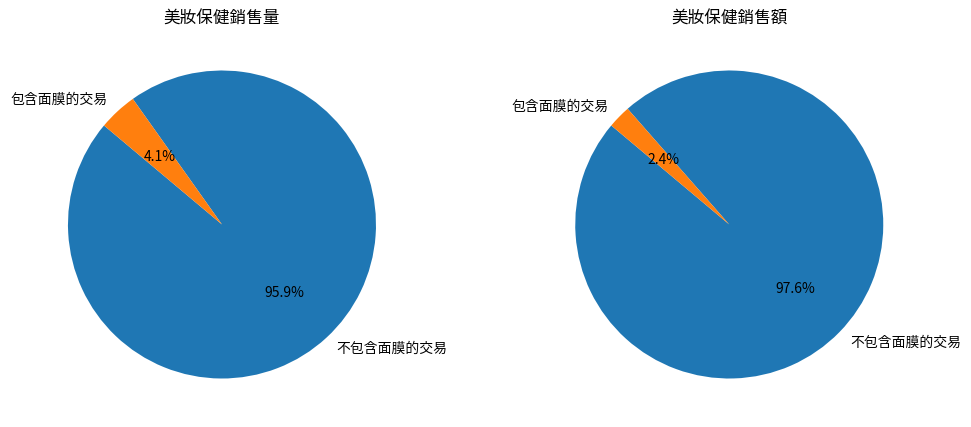

In [ ]:
select = df[df['name_clean_combi'].str.contains('面膜')]
quantity_mask = select['total_quantity'].sum()
amount_mask = select['total_amount'].sum()

# 交易中包含「面膜」的總銷售量
quantity_mask = select['total_quantity'].sum()
# 交易中包含「面膜」的總銷售額
amount_mask = select['total_amount'].sum()
# 美妝保健所有商品總銷售量
quantity_all = makeup['total_quantity'].sum() - quantity_mask
# 美妝保健所有商品總銷售額
amount_all = makeup['total_amount'].sum() - amount_mask

# 繪製兩張並排的圓餅圖
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 圓餅圖1: 美妝保健所有商品總銷售量 vs 美妝保健所有商品組合總銷售量
labels_quantity = ['不包含面膜的交易', '包含面膜的交易']
sizes_quantity = [quantity_all, quantity_mask]
axes[0].pie(sizes_quantity, labels=labels_quantity, autopct='%1.1f%%', startangle=140)
axes[0].set_title('美妝保健銷售量')

# 圓餅圖2: 美妝保健所有商品總銷售額 vs 美妝保健所有商品組合總銷售額
labels_amount = ['不包含面膜的交易', '包含面膜的交易']
sizes_amount = [amount_all, amount_mask]
axes[1].pie(sizes_amount, labels=labels_amount, autopct='%1.1f%%', startangle=140)
axes[1].set_title('美妝保健銷售額')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


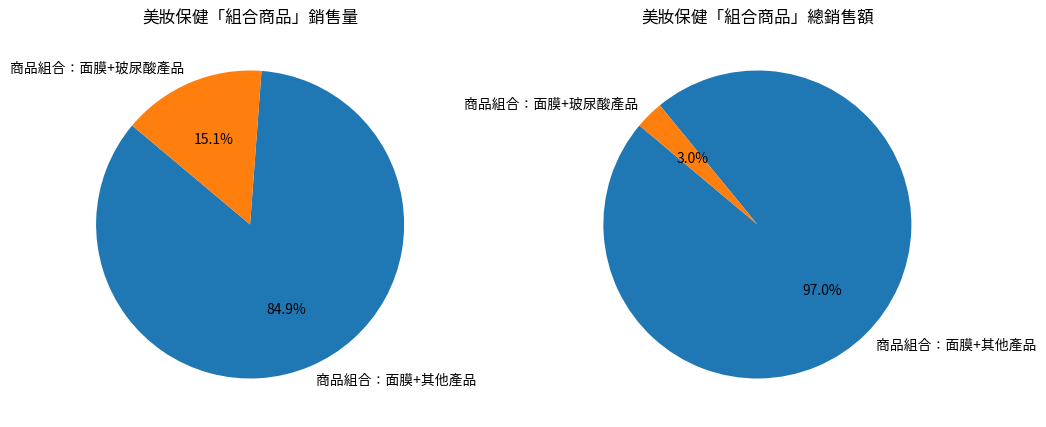

In [ ]:
# 購買組合2：「面膜+玻尿酸」
select2 = df[df['name_clean_combi'].str.contains('面膜') & df['name_clean_combi'].str.contains('玻尿酸')]
quantity2 = select2['total_quantity'].sum()
amount2 = select2['total_amount'].sum()
# 購買組合1：「面膜+其他東西」
select1 = df[df['name_clean_combi'].str.contains('面膜') & (df['num_product'] > 1)]
quantity1 = select1['total_quantity'].sum() - quantity2
amount1 = select1['total_amount'].sum() - amount2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 圓餅圖1: quantity1 vs quantity2
labels_quantity = ['商品組合：面膜+其他產品', '商品組合：面膜+玻尿酸產品']
sizes_quantity = [quantity1, quantity2]
axes[0].pie(sizes_quantity, labels=labels_quantity, autopct='%1.1f%%', startangle=140)
axes[0].set_title('美妝保健「組合商品」銷售量')
# 圓餅圖2: amount1 vs amount2
labels_amount = ['商品組合：面膜+其他產品', '商品組合：面膜+玻尿酸產品']
sizes_amount = [amount1, amount2]
axes[1].pie(sizes_amount, labels=labels_amount, autopct='%1.1f%%', startangle=140)
axes[1].set_title('美妝保健「組合商品」總銷售額')
plt.show()

In [ ]:
# 篩選 玻尿酸 面膜
temp1 = pd.DataFrame()
check = ['玻尿酸','面膜']
for j in range(len(df)):
  if any(w in df['name_clean_combi'][j].split() for w in check):
    temp1 = pd.concat([temp1, df.iloc[[j]]])
temp1.reset_index(drop=True, inplace=True)

cate = ['玻尿酸', '面膜', '玻尿酸+一項', '面膜+一項', '玻尿酸+面膜', '玻尿酸+面膜+多項', '玻尿酸+多項', '面膜+多項']
temp1['cate'] = None
temp1.loc[(temp1['num_product']==1) & (temp1['name_clean_combi'].str.contains('玻尿酸')), 'cate'] = cate[0]
temp1.loc[(temp1['num_product']==1) & (temp1['name_clean_combi'].str.contains('面膜')), 'cate'] = cate[1]
temp1.loc[(temp1['num_product']==2) & (temp1['name_clean_combi'].str.contains('玻尿酸')) & (~temp1['name_clean_combi'].str.contains('面膜')), 'cate'] = cate[2]
temp1.loc[(temp1['num_product']==2) & (temp1['name_clean_combi'].str.contains('面膜')) & (~temp1['name_clean_combi'].str.contains('玻尿酸')), 'cate'] = cate[3]
temp1.loc[(temp1['num_product']==2) & (temp1['name_clean_combi'].str.contains('玻尿酸')) & (temp1['name_clean_combi'].str.contains('面膜')), 'cate'] = cate[4]
temp1.loc[(temp1['num_product']>2) & (temp1['name_clean_combi'].str.contains('玻尿酸')) & (temp1['name_clean_combi'].str.contains('面膜')), 'cate'] = cate[5]
temp1.loc[(temp1['num_product']>2) & (temp1['name_clean_combi'].str.contains('玻尿酸')) & (~temp1['name_clean_combi'].str.contains('面膜')), 'cate'] = cate[6]
temp1.loc[(temp1['num_product']>2) & (temp1['name_clean_combi'].str.contains('面膜')) & (~temp1['name_clean_combi'].str.contains('玻尿酸')), 'cate'] = cate[7]

In [ ]:
plot_df = temp1.groupby(['cate']).agg({'total_quantity':'sum', 'total_amount':'sum'}).reset_index().sort_values(by='total_amount')
plot_df['total_quantity_prob'] = plot_df['total_quantity']/plot_df['total_quantity'].sum()
plot_df['total_amount_prob'] = plot_df['total_amount']/plot_df['total_amount'].sum()
plot_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cate,total_quantity,total_amount,total_quantity_prob,total_amount_prob
4,面膜,76,5700,0.000611,0.000087
2,玻尿酸+面膜,11221,596987,0.090171,0.009161
0,玻尿酸+一項,3110,1377471,0.024992,0.021137
3,玻尿酸+面膜+多項,8824,1453392,0.070909,0.022302
1,玻尿酸+多項,3228,2569948,0.025940,0.039435
5,面膜+一項,71870,25647455,0.577538,0.393551
6,面膜+多項,26113,33518348,0.209841,0.514327


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-51205f850cb7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(plot_df['cate'], rotation=25, ha='right')


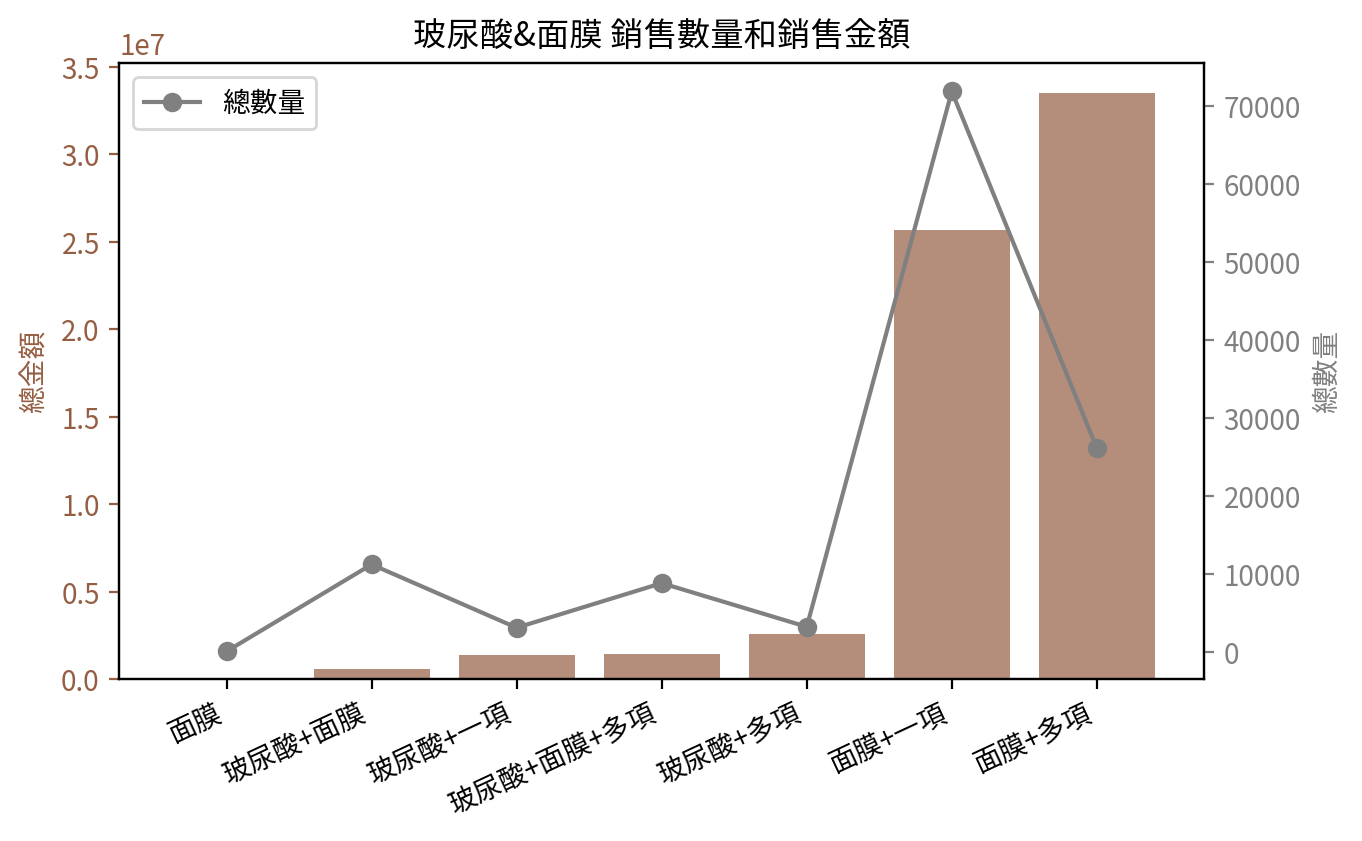

In [ ]:
fig, ax1 = plt.subplots(figsize=(7, 4), dpi=200)

# 第一個 Y 軸（金額）
ax1.bar(plot_df['cate'], plot_df['total_amount'],color='#955E42', alpha=0.7, label='金額')
ax1.set_ylabel('總金額', color='#955E42')
ax1.tick_params('y', colors='#955E42')

# 第二個 Y 軸（數量）
ax2 = ax1.twinx()
ax2.plot(plot_df['cate'], plot_df['total_quantity'], color='gray', marker='o', label='總數量')
ax2.set_ylabel('總數量', color='gray')
ax2.tick_params('y', colors='gray')

ax1.set_xticklabels(plot_df['cate'], rotation=25, ha='right')

plt.title('玻尿酸&面膜 銷售數量和銷售金額')
plt.legend(loc='upper left')
plt.show()

## B群＋薑黃維生素

In [ ]:
df_all.drop(columns=['Unnamed: 0','time','commodity_id','category'], inplace=True)

In [ ]:
mask_b_ginger = df_all['name_clean_combi'].str.contains('B群') & df_all['name_clean_combi'].str.contains('薑黃維生素')
selected_b_ginger = df_all[mask_b_ginger]
print('B群＋薑黃維生素的銷售總金額:')
print(selected_b_ginger['total_amount'].sum())

B群＋薑黃維生素的銷售總金額:
9607847


In [ ]:
# 稍微看過，主要是下面這兩種
# 薑黃維生素 B群+C
# 薑黃維生素C+B群

selected_b_ginger

,id,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination,name_clean,num_product,name_clean_combi
4658,6949854,薑黃維生素C+B群(120顆),838,399,334362,2022,3,6,17,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
9645,7865834,第006標(3/25)2024/1 DAILIN薑黃維生素C+B群230MG*120顆/罐-...,37,1199,44363,2022,3,25,12,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
9646,7866059,第007標(3/25)2024/1 DAILIN薑黃維生素C+B群230MG*120顆/罐-...,34,2280,77520,2022,3,25,12,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
13874,8686657,薑黃維生素C+B群(120顆),2088,399,833112,2022,4,10,16,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
17887,9392108,薑黃維生素C+B群(120顆),1043,380,396340,2022,4,24,18,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
18250,9460892,888 0426 A11-(1罐)Dailin薑黃維生素C+B群(120顆入)(素食可)*1,13,499,6487,2022,4,26,13,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
18251,9460896,888 0426 A12-(5罐)Dailin薑黃維生素C+B群(120顆入)(素食可)*5,45,1950,87750,2022,4,26,13,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
18865,9583313,888 0428 A11-(1罐)Dailin薑黃維生素C+B群(120顆入)(素食可)*1,13,499,6487,2022,4,28,17,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
18866,9583330,888 0428 A12-(5罐)Dailin薑黃維生素C+B群(120顆入)(素食可)*5,8,1950,15600,2022,4,28,17,1,1,薑黃 維生素 B群,2,薑黃維生素 B群
21605,9997736,7.CJ08-DAILIN薑黃維生素 B群+C (120顆/罐)(市價950) 今天一罐只要...,479,499,239029,2022,5,7,5,1,1,薑黃 維生素 B群,1,薑黃維生素B群


In [ ]:
df_b_ginger_month = pd.DataFrame(selected_b_ginger.groupby(['month'])['total_amount'].sum())
df_b_ginger_month

,total_amount
month,
3,456245
4,1345776
5,955610
6,804234
7,1017185
8,1236598
9,1022824
10,503745
11,739320


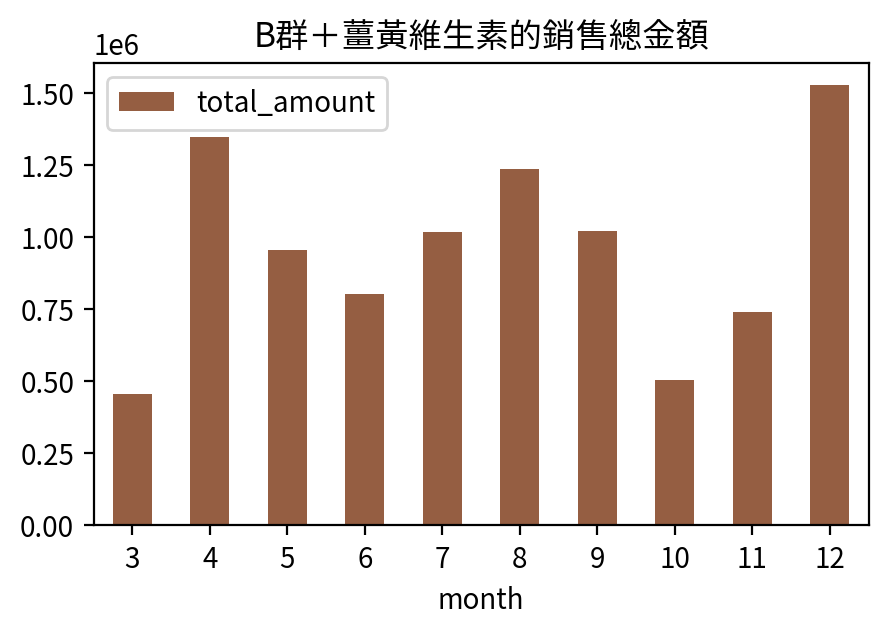

In [ ]:
# 算是穩定每個月都有
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
df_b_ginger_month.plot.bar(y='total_amount', rot=0, color='#955E42', ax=ax)
plt.title('B群＋薑黃維生素的銷售總金額')
plt.show()

In [ ]:
# 看B群
mask_b = df_all['name_clean_combi'].str.contains('B群')
selected_b = df_all[mask_b]
selected_b.head()

,id,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination,name_clean,num_product,name_clean_combi
210,4192235,(1/4晚04)醫之方長釋B群EX PLUS加強錠(60粒)3盒1組,48,1199,57552,2022,1,4,13,0,0,B群 錠,1,B群錠
284,4306506,30號派康斯酵素B群,33,158,5214,2022,1,6,13,0,0,酵素 B群,1,酵素B群
408,4412063,【碧荷柏】蠻哥鋅男人天然B群 【碧荷柏】紅石榴鐵定紅顏女天然B群素膠囊(30顆/瓶) 任選兩入,4,499,1996,2022,1,8,9,0,0,B群 B群 膠囊,1,B群B群膠囊
560,4510981,100.CJ65-白蘭氏鐵+維他命B群 鷄精錠 (90錠)(官網瓶980)(非即期品效期都1...,74,493,36450,2022,1,10,2,2,1,維他命 B群 錠 錠,2,維他命B群錠 錠
701,4631730,RF 第 007 標 (1/12)=【台塑生醫】醫之方長釋B群EX PLUS加強錠(60粒),470,594,279139,2022,1,12,8,0,0,B群 錠,1,B群錠


In [ ]:
df_b_num_product = pd.DataFrame(selected_b.groupby(['num_product'])['total_amount'].sum())
df_b_num_product

,total_amount
num_product,
1,11330100
2,13996040
3,225332
4,79230
5,85356
6,35280


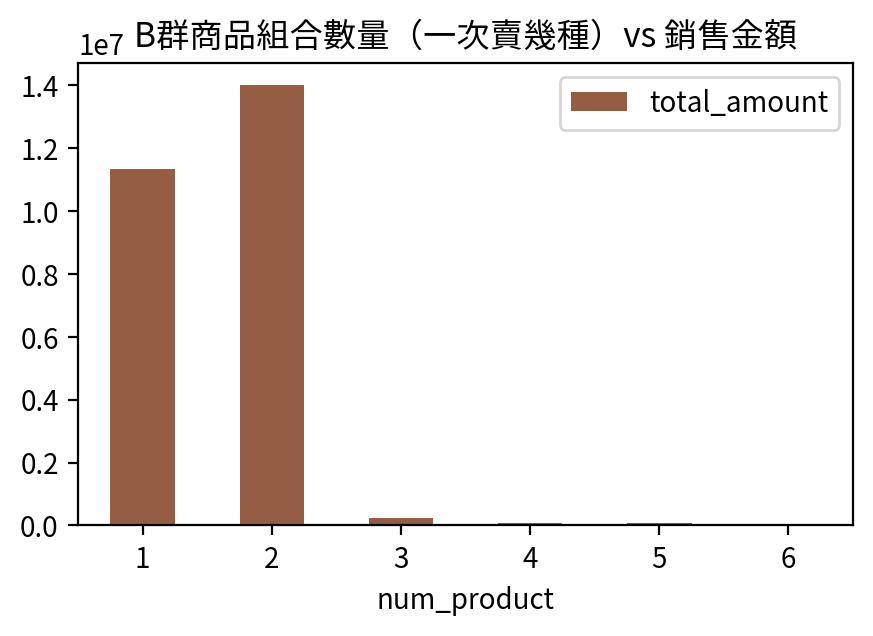

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
df_b_num_product.plot.bar(y='total_amount', rot=0, color='#955E42', ax=ax)
plt.title('B群商品組合數量（一次賣幾種）vs 銷售金額')
plt.show()
# B群單賣的銷售總額就不錯，但組合的更高

In [ ]:
# B群＋其他
selected_b_combi = selected_b[selected_b['num_product']>1]
mask = selected_b_combi['name_clean_combi'].str.contains('薑黃維生素')
selected_b_others = selected_b_combi[~mask]

In [ ]:
# 稍微看一下
for i in range(10):
  print(selected_b_others.iloc[i]['name'])

100.CJ65-白蘭氏鐵+維他命B群 鷄精錠 (90錠)(官網瓶980)(非即期品效期都1年以上) 樂敗獨家授權販售 賠錢價499+數量
Jele Beautie 維生素 B群+C黑醋栗凍飲
醫之方長釋B群EX PLUS加強錠-300粒+FORTE美纖萃晶凍2包/1卡*2"效期正常 一年以上"
Y312 派康斯 粉蔓越莓C膠原蛋白/綠酵素蔬果B群30粒
07.CJ65-白蘭氏鐵+維他命B群 鷄精錠 (90錠)(官網瓶980)(非即期品效期都1年以上) 樂敗獨家授權販售 299
Y312 派康斯 粉蔓越莓C膠原蛋白/綠酵素蔬果B群30粒
A27-白蘭氏鐵+維他命B群 雞精錠 90錠+獨家加碼贈白蘭氏鐵+維他命B群 雞精錠 15錠
第 007 標 (3/7)牛樟芝菌絲體碇10盒+牛樟芝子實體8盒+牛樟芝B群
A267(0309)甘胺酸亞鐵+天然B群30粒
醫之方長釋B群EX PLUS(60粒)三盒組(贈隨身瓶)


In [ ]:
df_onlyB = selected_b[selected_b['num_product']==1]

onlyB_amount = df_onlyB['total_amount'].sum()
B_ginger_amount = selected_b_ginger['total_amount'].sum()
B_others_amount = selected_b_others['total_amount'].sum()

onlyB_quant = df_onlyB['total_quantity'].sum()
B_ginger_quant = selected_b_ginger['total_quantity'].sum()
B_others_quant = selected_b_others['total_quantity'].sum()

d = {'category': ['只有B群','B群+薑黃維生素','B群+其他'],\
     'total_amount':[onlyB_amount, B_ginger_amount, B_others_amount],\
     'total_quantity':[onlyB_quant, B_ginger_quant, B_others_quant]}
plot_df = pd.DataFrame(data=d)
plot_df['ratio_amount'] = plot_df['total_amount']/(selected_b['total_amount'].sum())
plot_df['ratio_quantity'] = plot_df['total_quantity']/(selected_b['total_quantity'].sum())
plot_df.head()

,category,total_amount,total_quantity,ratio_amount,ratio_quantity
0,只有B群,11330100,23270,0.439981,0.411603
1,B群+薑黃維生素,9607847,22575,0.373101,0.399310
2,B群+其他,5283944,11636,0.205191,0.205819


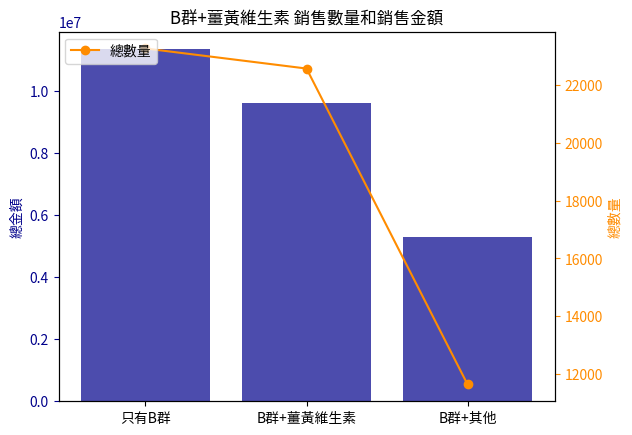

In [ ]:
fig, ax1 = plt.subplots()

# 第一個 Y 軸（金額）
ax1.bar(plot_df['category'], plot_df['total_amount'],color='darkblue', alpha=0.7, label='金額')
ax1.set_ylabel('總金額', color='darkblue')
ax1.tick_params('y', colors='darkblue')

# 第二個 Y 軸（數量）
ax2 = ax1.twinx()
ax2.plot(plot_df['category'], plot_df['total_quantity'], color='darkorange', marker='o', label='總數量')
ax2.set_ylabel('總數量', color='darkorange')
ax2.tick_params('y', colors='darkorange')


plt.title('B群+薑黃維生素 銷售數量和銷售金額')
plt.legend(loc='upper left')
plt.show()

## 蜂膠

In [ ]:
!gdown '1bGE8invRa0T8MjYEdbkR_iUoxocEm52m'
ar = pd.read_csv('ar_eda.csv')
print(ar.shape)
ar.head(3)

Downloading...
From: https://drive.google.com/uc?id=1bGE8invRa0T8MjYEdbkR_iUoxocEm52m
To: /content/ar_eda.csv
100% 9.75k/9.75k [00:00<00:00, 21.6MB/s]
(41, 15)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,total_quantity,ave_price,total_amount,ave_num_product,rules
0,膠原,膠原蛋白,0.056090,0.078283,0.043850,0.781778,9.986584,0.039459,4.223766,0.953338,66398,2107.375000,6771971,3.604167,"膠原, 膠原蛋白"
1,酵素錠,錠,0.046310,0.131114,0.041033,0.886045,6.757842,0.034961,7.624802,0.893397,62133,1274.652941,49021301,2.664706,"酵素錠, 錠"
2,護墊,衛生棉,0.026813,0.020505,0.020094,0.749433,36.548768,0.019544,3.909122,0.999437,30427,235.466216,1619642,2.148649,"護墊, 衛生棉"


In [ ]:
df = pd.read_csv('df_name_clean_combi.csv')
df.drop(columns=['Unnamed: 0','time','commodity_id','category'], inplace=True)
print(df.shape)
df.head(3)

In [ ]:
# 觀察跟蜂膠洗髮有關的rules
ar[ar['rules'].str.contains('蜂膠洗髮')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,total_quantity,ave_price,total_amount,ave_num_product,rules
15,潤髮乳,蜂膠洗髮,0.013825,0.013235,0.012303,0.889940,67.243479,0.01212,8.965689,0.998939,18630,297.307692,5480254,2.0,"潤髮乳, 蜂膠洗髮"
16,蜂膠洗髮,潤髮乳,0.013235,0.013825,0.012303,0.929641,67.243479,0.01212,14.016275,0.998341,18630,297.307692,5480254,2.0,"蜂膠洗髮, 潤髮乳"


In [ ]:
# 篩選 蜂膠洗髮 潤髮乳
temp1 = pd.DataFrame()
check = ['蜂膠洗髮','潤髮乳']
for j in range(len(df)):
  if any(w in df['name_clean_combi'][j].split() for w in check):
    temp1 = pd.concat([temp1, df.iloc[[j]]])
temp1.reset_index(drop=True, inplace=True)
print(temp1.shape)
temp1.head(3)

(215, 14)


,id,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination,name_clean,num_product,name_clean_combi
0,4182886,BX 第 009 標 (1/4)= 韓國韓妍漢方潤髮乳,193,89,17177,2022,1,4,6,0,0,潤髮 乳,1,潤髮乳
1,4293920,第 126 標(1/5)2024/11月台灣製炭．蜂膠洗髮精500ML一罐100元,156,100,15600,2022,1,6,7,0,0,蜂膠 洗髮,1,蜂膠洗髮
2,4687261,BX 第 013 標 (1/13)= 韓國 KeraSys 可瑞絲『最新款』蜂膠活力光澤 洗...,852,334,284755,2022,1,13,8,0,0,蜂膠 洗髮 護髮,2,蜂膠洗髮 護髮


In [ ]:
temp1['num_product'].value_counts()

1    116
2     69
3     17
4      9
6      3
5      1
Name: num_product, dtype: int64

In [ ]:
cate = ['蜂膠洗髮', '潤髮乳', '蜂膠洗髮+一項', '潤髮乳+一項', '蜂膠洗髮+潤髮乳', '蜂膠洗髮+潤髮乳+多項', '蜂膠洗髮+多項', '潤髮乳+多項']

temp1['cate'] = None
temp1.loc[(temp1['num_product']==1) & (temp1['name_clean_combi'].str.contains('蜂膠洗髮')), 'cate'] = cate[0]
temp1.loc[(temp1['num_product']==1) & (temp1['name_clean_combi'].str.contains('潤髮乳')), 'cate'] = cate[1]
temp1.loc[(temp1['num_product']==2) & (temp1['name_clean_combi'].str.contains('蜂膠洗髮')) & (~temp1['name_clean_combi'].str.contains('潤髮乳')), 'cate'] = cate[2]
temp1.loc[(temp1['num_product']==2) & (temp1['name_clean_combi'].str.contains('潤髮乳')) & (~temp1['name_clean_combi'].str.contains('蜂膠洗髮')), 'cate'] = cate[3]
temp1.loc[(temp1['num_product']==2) & (temp1['name_clean_combi'].str.contains('蜂膠洗髮')) & (temp1['name_clean_combi'].str.contains('潤髮乳')), 'cate'] = cate[4]
temp1.loc[(temp1['num_product']>2) & (temp1['name_clean_combi'].str.contains('蜂膠洗髮')) & (temp1['name_clean_combi'].str.contains('潤髮乳')), 'cate'] = cate[5]
temp1.loc[(temp1['num_product']>2) & (temp1['name_clean_combi'].str.contains('蜂膠洗髮')) & (~temp1['name_clean_combi'].str.contains('潤髮乳')), 'cate'] = cate[6]
temp1.loc[(temp1['num_product']>2) & (temp1['name_clean_combi'].str.contains('潤髮乳')) & (~temp1['name_clean_combi'].str.contains('蜂膠洗髮')), 'cate'] = cate[7]

temp1.head(3)

,id,name,total_quantity,price,total_amount,year,month,day,hr,num_+,combination,name_clean,num_product,name_clean_combi,cate
0,4182886,BX 第 009 標 (1/4)= 韓國韓妍漢方潤髮乳,193,89,17177,2022,1,4,6,0,0,潤髮 乳,1,潤髮乳,潤髮乳
1,4293920,第 126 標(1/5)2024/11月台灣製炭．蜂膠洗髮精500ML一罐100元,156,100,15600,2022,1,6,7,0,0,蜂膠 洗髮,1,蜂膠洗髮,蜂膠洗髮
2,4687261,BX 第 013 標 (1/13)= 韓國 KeraSys 可瑞絲『最新款』蜂膠活力光澤 洗...,852,334,284755,2022,1,13,8,0,0,蜂膠 洗髮 護髮,2,蜂膠洗髮 護髮,蜂膠洗髮+一項


In [ ]:
temp1['cate'].value_counts()

潤髮乳         74
蜂膠洗髮        42
潤髮乳+一項      32
潤髮乳+多項      29
蜂膠洗髮+一項     24
蜂膠洗髮+潤髮乳    13
蜂膠洗髮+多項      1
Name: cate, dtype: int64

In [ ]:
plot_df = temp1.groupby(['cate']).agg({'total_quantity':'sum', 'total_amount':'sum'}).reset_index().sort_values(by='total_amount')
plot_df['total_quantity_prob'] = plot_df['total_quantity']/plot_df['total_quantity'].sum()
plot_df['total_amount_prob'] = plot_df['total_amount']/plot_df['total_amount'].sum()
plot_df

,cate,total_quantity,total_amount,total_quantity_prob,total_amount_prob
5,蜂膠洗髮+多項,78,20280,0.002955,0.002274
0,潤髮乳,899,384988,0.034061,0.043175
1,潤髮乳+一項,1175,580604,0.044518,0.065112
4,蜂膠洗髮+一項,1332,599249,0.050466,0.067203
2,潤髮乳+多項,1129,762085,0.042775,0.085464
3,蜂膠洗髮,3151,1089542,0.119383,0.122187
6,蜂膠洗髮+潤髮乳,18630,5480254,0.705842,0.614585


<ipython-input-26-2d74f4c0805c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(plot_df['cate'], rotation=25, ha='right')


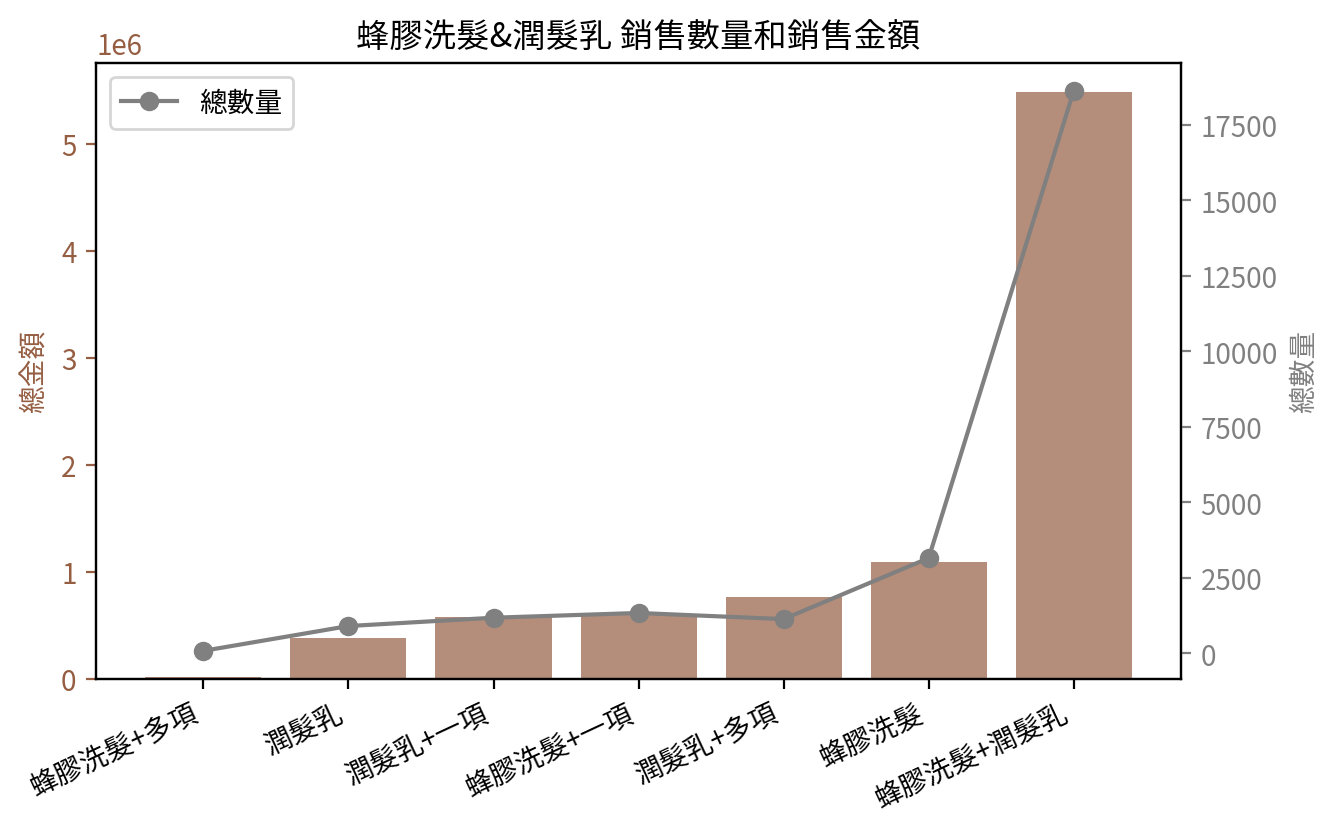

In [ ]:
fig, ax1 = plt.subplots(figsize=(7, 4), dpi=200)

# 第一個 Y 軸（金額）
ax1.bar(plot_df['cate'], plot_df['total_amount'],color='#955E42', alpha=0.7, label='金額')
ax1.set_ylabel('總金額', color='#955E42')
ax1.tick_params('y', colors='#955E42')

# 第二個 Y 軸（數量）
ax2 = ax1.twinx()
ax2.plot(plot_df['cate'], plot_df['total_quantity'], color='gray', marker='o', label='總數量')
ax2.set_ylabel('總數量', color='gray')
ax2.tick_params('y', colors='gray')

ax1.set_xticklabels(plot_df['cate'], rotation=25, ha='right')

plt.title('蜂膠洗髮&潤髮乳 銷售數量和銷售金額')
plt.legend(loc='upper left')
plt.show()

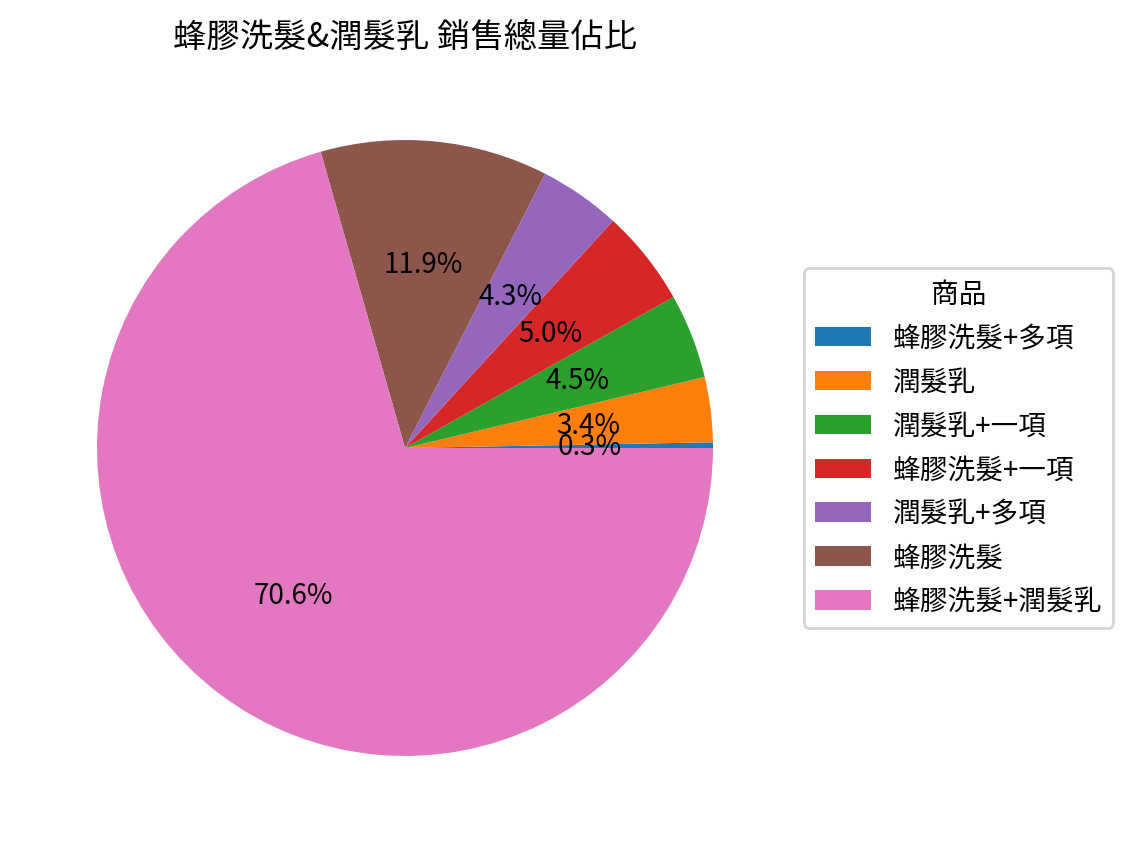

In [ ]:
plt.figure(figsize=(5,5), dpi=200)
plt.pie(plot_df['total_quantity_prob'], autopct='%1.1f%%')
plt.legend(plot_df['cate'], title='商品', bbox_to_anchor=(1, 0.5), loc='center left')
plt.title('蜂膠洗髮&潤髮乳 銷售總量佔比')
plt.show()

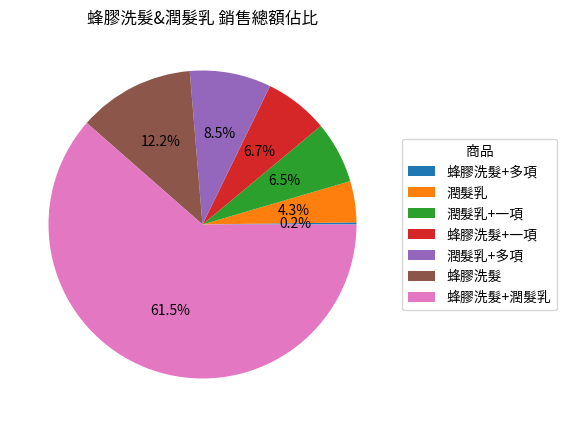

In [ ]:
plt.figure(figsize=(5,5), dpi=200)
plt.pie(plot_df['total_amount_prob'], autopct='%1.1f%%')
plt.legend(plot_df['cate'], title='商品', bbox_to_anchor=(1, 0.5), loc='center left')
plt.title('蜂膠洗髮&潤髮乳 銷售總額佔比')
plt.show()

In [ ]:
# 潤髮乳+「其他」有哪些（只看兩種商品的組合）
temp2 = temp1[temp1['cate']=='潤髮乳+其他']
temp2.reset_index(drop=True, inplace=True)

temp2_combi = []
for j in range(len(temp2)):
  temp2_combi += temp2['name_clean_combi'][j].split()
  temp2_combi = list(set(temp2_combi))
temp2_combi

['蜂膠', '抗皺眼霜', '洗髮', '水', '養髮霜', '香皂', '潤髮乳', '洗髮乳']

In [ ]:
# 蜂膠洗髮+「其他」有哪些（只看兩種商品的組合）
temp3 = temp1[temp1['cate']=='蜂膠洗髮+其他']
temp3.reset_index(drop=True, inplace=True)

temp3_combi = []
for j in range(len(temp3)):
  temp3_combi += temp3['name_clean_combi'][j].split()
  temp3_combi = list(set(temp3_combi))
temp3_combi

['蜂膠', '蜂膠洗髮', '潤髮', '護髮素', '髮膜', '髮油', '護髮']

<Axes: xlabel='month', ylabel='total_quantity'>

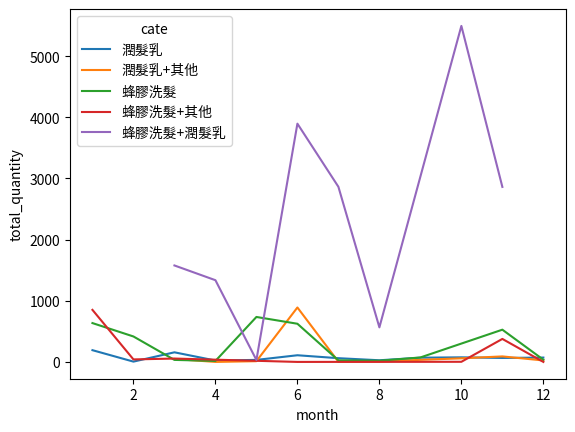

In [ ]:
# 不同月份下的銷售總量
sns.lineplot(data=temp1.groupby(['cate','month']).agg({'total_quantity':'sum'}).reset_index(),
             x="month", y="total_quantity", hue="cate")

<Axes: xlabel='month', ylabel='total_amount'>

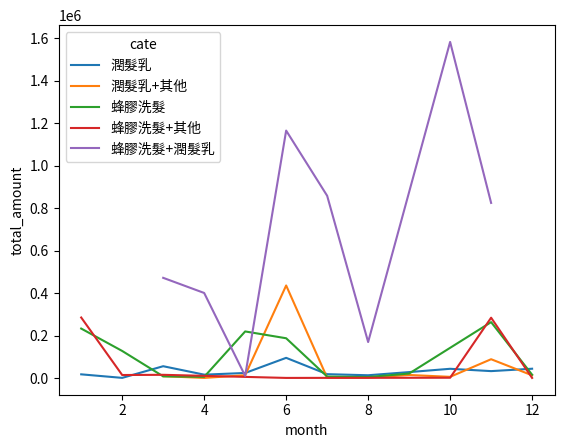

In [ ]:
# 不同月份下的銷售總額
sns.lineplot(data=temp1.groupby(['cate','month']).agg({'total_amount':'sum'}).reset_index(),
             x="month", y="total_amount", hue="cate")